In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Vehicle/train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
x = df.drop('loan_default',axis = 1)
y = df['loan_default']

from sklearn.model_selection import train_test_split

trainx,testx, trainy, testy = train_test_split(x,y, test_size = 0.30, random_state = 10)

In [4]:
print(trainx.shape)
print(testx.shape)

(163207, 40)
(69947, 40)


In [5]:
train = pd.concat((trainx, trainy), axis = 1)
test = pd.concat((testx, testy), axis = 1)

In [6]:
print(train.shape)
print(test.shape)

(163207, 41)
(69947, 41)


In [7]:
df_new = train.copy()
df_new2 = test.copy()

In [8]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69947 entries, 121830 to 104601
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UniqueID                             69947 non-null  int64  
 1   disbursed_amount                     69947 non-null  int64  
 2   asset_cost                           69947 non-null  int64  
 3   ltv                                  69947 non-null  float64
 4   branch_id                            69947 non-null  int64  
 5   supplier_id                          69947 non-null  int64  
 6   manufacturer_id                      69947 non-null  int64  
 7   Current_pincode_ID                   69947 non-null  int64  
 8   Date.of.Birth                        69947 non-null  object 
 9   Employment.Type                      67671 non-null  object 
 10  DisbursalDate                        69947 non-null  object 
 11  State_ID              

### Generating Separate dataframes for feature transformation and feature generation

In [9]:
dft = df_new2.copy()
dfg = df_new2.copy()

In [11]:
dft.shape

(69947, 41)

In [12]:
dfg.shape

(69947, 41)

In [10]:
#Data Transform DataFrame

In [13]:
dft[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = dft['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
dft[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = dft['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
dft["AVERAGE.ACCT.AGE"]= dft["AVERAGE_ACCT_Year"].astype(str).astype(int)+((dft["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
dft = dft.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])

In [14]:
dft[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = dft['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
dft[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = dft['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
dft["CREDIT.HISTORY.LENGTH"]= dft["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((dft["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
dft = dft.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [15]:
dft.shape

(69947, 41)

In [16]:
dft.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        2276
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [17]:
dft['Passport_flag'] = dft['Passport_flag'].astype('object')
dft['MobileNo_Avl_Flag'] = dft['MobileNo_Avl_Flag'].astype('object')
dft['Aadhar_flag'] = dft['Aadhar_flag'].astype('object')
dft['PAN_flag'] = dft['PAN_flag'].astype('object')
dft['VoterID_flag'] = dft['VoterID_flag'].astype('object')
dft['Driving_flag'] = dft['Driving_flag'].astype('object')

In [18]:
#Data Generation dataframe

In [19]:
dfg.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [20]:
dfg[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = dfg['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
dfg[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = dfg['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
dfg["AVERAGE.ACCT.AGE"]= dfg["AVERAGE_ACCT_Year"].astype(str).astype(int)+((dfg["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
dfg = dfg.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])



In [21]:
dfg[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = dfg['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
dfg[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = dfg['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
dfg["CREDIT.HISTORY.LENGTH"]= dfg["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((dfg["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
dfg = dfg.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [22]:
dfg.shape

(69947, 41)

In [23]:
dfg.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        2276
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [24]:
dfg['Passport_flag'] = dfg['Passport_flag'].astype('object')
dfg['MobileNo_Avl_Flag'] = dfg['MobileNo_Avl_Flag'].astype('object')
dfg['Aadhar_flag'] = dfg['Aadhar_flag'].astype('object')
dfg['PAN_flag'] = dfg['PAN_flag'].astype('object')
dfg['VoterID_flag'] = dfg['VoterID_flag'].astype('object')
dfg['Driving_flag'] = dfg['Driving_flag'].astype('object')

In [25]:
k = df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index
v = df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().values
dt = {}
dt.update(zip(k,v)) 


In [26]:
dt

{'No Bureau History Available': 116950,
 'C-Very Low Risk': 16045,
 'A-Very Low Risk': 14124,
 'D-Very Low Risk': 11358,
 'B-Very Low Risk': 9201,
 'M-Very High Risk': 8776,
 'F-Low Risk': 8485,
 'K-High Risk': 8277,
 'H-Medium Risk': 6855,
 'E-Low Risk': 5821,
 'I-Medium Risk': 5557,
 'G-Low Risk': 3988,
 'Not Scored: Sufficient History Not Available': 3765,
 'J-High Risk': 3748,
 'Not Scored: Not Enough Info available on the customer': 3672,
 'Not Scored: No Activity seen on the customer (Inactive)': 2885,
 'Not Scored: No Updates available in last 36 months': 1534,
 'L-Very High Risk': 1134,
 'Not Scored: Only a Guarantor': 976,
 'Not Scored: More than 50 active Accounts found': 3}

In [27]:
dfg['encoded_cns_score_desc'] = dfg['PERFORM_CNS.SCORE.DESCRIPTION'].map(dt)
dfg.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc
121830,445909,59013,68200,89.15,135,15680,45,1798,11-06-76,Salaried,...,0,0,0,1,0,0.500000,1.083333,0,0,16045
226967,647025,62713,71413,88.92,19,16982,86,1871,01-06-81,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,116950
32326,532298,54713,76736,73.89,120,22936,86,6927,01-01-90,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,116950
172421,642562,40010,55547,73.45,136,18651,48,4301,05-07-81,Salaried,...,0,17372,0,0,0,5.583333,10.250000,0,0,9201
53896,449994,57413,66350,88.77,2,22764,86,1730,01-01-63,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,1,116950


In [28]:
dft['PERFORM_CNS.SCORE.DESCRIPTION'] = dft['PERFORM_CNS.SCORE.DESCRIPTION'].map(dt)
dft.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
121830,445909,59013,68200,89.15,135,15680,45,1798,11-06-76,Salaried,...,0,0,0,0,1,0,0.500000,1.083333,0,0
226967,647025,62713,71413,88.92,19,16982,86,1871,01-06-81,Salaried,...,0,0,0,0,0,0,0.000000,0.000000,0,0
32326,532298,54713,76736,73.89,120,22936,86,6927,01-01-90,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,0,0
172421,642562,40010,55547,73.45,136,18651,48,4301,05-07-81,Salaried,...,0,0,17372,0,0,0,5.583333,10.250000,0,0
53896,449994,57413,66350,88.77,2,22764,86,1730,01-01-63,Salaried,...,0,0,0,0,0,0,0.000000,0.000000,0,1


In [29]:
#import datetime as dt

In [30]:
#df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format = "%d-%m-%y")

In [31]:
#now = pd.Timestamp('now')

In [32]:
#df['age'] = (now - df['Date.of.Birth'])

In [33]:
#df['age']  = df['age'].astype(str)

#df[['age','age_waste']] = df['age'].str.split("days",expand=True)
#df['age']= df['age'].astype(str).astype(int)

#df= df.drop(['age_waste'],axis = 1)

In [34]:
#missing value treatment

In [35]:
dfg = dfg.dropna(axis = 0)
dfg.shape

(67671, 42)

In [36]:
dft = dft.dropna(axis = 0)
dft.shape

(67671, 41)

In [37]:
print(dfg.isnull().sum())
print()
print(dft.isnull().sum())

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [38]:
#outlier treatment

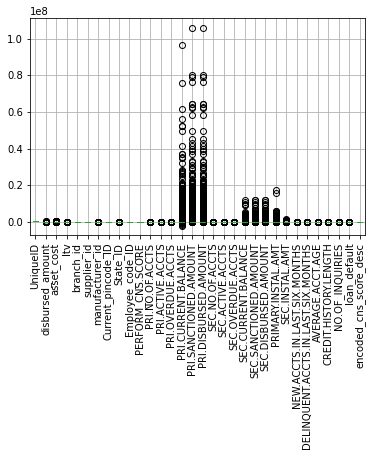

In [39]:
dfg.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [40]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67671 entries, 121830 to 41528
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UniqueID                             67671 non-null  int64  
 1   disbursed_amount                     67671 non-null  int64  
 2   asset_cost                           67671 non-null  int64  
 3   ltv                                  67671 non-null  float64
 4   branch_id                            67671 non-null  int64  
 5   supplier_id                          67671 non-null  int64  
 6   manufacturer_id                      67671 non-null  int64  
 7   Current_pincode_ID                   67671 non-null  int64  
 8   Date.of.Birth                        67671 non-null  object 
 9   Employment.Type                      67671 non-null  object 
 10  DisbursalDate                        67671 non-null  object 
 11  State_ID               

In [41]:
# Removing unnecessary columns

In [42]:
dfg = dfg.drop(['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'],axis = 1)

In [43]:
dft = dft.drop(['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate'],axis = 1)

In [44]:
print(dfg.shape)
print(dft.shape)

(67671, 32)
(67671, 32)


In [45]:
dfg.reset_index(drop = True, inplace = True)
dft.reset_index(drop = True, inplace = True)

In [46]:
print(dfg.index)
print(dft.index)

RangeIndex(start=0, stop=67671, step=1)
RangeIndex(start=0, stop=67671, step=1)


In [47]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67671 entries, 0 to 67670
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   disbursed_amount                     67671 non-null  int64  
 1   asset_cost                           67671 non-null  int64  
 2   ltv                                  67671 non-null  float64
 3   Employment.Type                      67671 non-null  object 
 4   MobileNo_Avl_Flag                    67671 non-null  object 
 5   Aadhar_flag                          67671 non-null  object 
 6   PAN_flag                             67671 non-null  object 
 7   VoterID_flag                         67671 non-null  object 
 8   Driving_flag                         67671 non-null  object 
 9   Passport_flag                        67671 non-null  object 
 10  PERFORM_CNS.SCORE                    67671 non-null  int64  
 11  PRI.NO.OF.ACCTS             

In [48]:
dfg['disbursed_amount'].head(10)

0    59013
1    62713
2    54713
3    40010
4    57413
5    25729
6    57853
7    61213
8    38439
9    45549
Name: disbursed_amount, dtype: int64

In [49]:
round(dfg.groupby('loan_default')['disbursed_amount'].mean(),2)

loan_default
0    53670.48
1    56293.45
Name: disbursed_amount, dtype: float64

In [50]:
# Add mean disbursed amount column wrt to loan default values in dfg dataframe

In [51]:
a = dfg[dfg['loan_default'] == 0].index
a = list(a)
print(a)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 28, 31, 32, 33, 34, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 169, 171, 173, 174, 175, 177, 178, 179, 180, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 227, 228, 230, 231, 232, 233, 234, 236, 238, 239, 241, 242, 244, 246, 247, 248, 250, 251, 252, 253, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 26

In [52]:
b = dfg[dfg['loan_default'] == 1].index
b = list(b)
print(b)

[4, 14, 17, 20, 27, 29, 30, 35, 37, 38, 39, 56, 74, 86, 87, 99, 101, 109, 110, 111, 133, 135, 136, 138, 140, 149, 150, 153, 159, 164, 170, 172, 176, 181, 186, 196, 197, 201, 203, 220, 225, 226, 229, 235, 237, 240, 243, 245, 249, 254, 256, 270, 274, 277, 281, 291, 294, 300, 305, 306, 307, 309, 313, 318, 320, 322, 327, 336, 338, 343, 346, 352, 354, 356, 362, 368, 375, 383, 403, 404, 407, 414, 422, 424, 427, 430, 433, 434, 436, 437, 438, 449, 451, 453, 456, 461, 474, 478, 486, 496, 501, 504, 507, 515, 518, 525, 529, 531, 536, 537, 541, 550, 553, 555, 560, 561, 563, 564, 573, 582, 586, 588, 589, 590, 594, 603, 604, 605, 612, 614, 615, 616, 617, 625, 626, 631, 635, 638, 642, 646, 653, 656, 668, 670, 672, 678, 679, 682, 686, 689, 690, 694, 700, 710, 719, 724, 734, 739, 755, 758, 766, 772, 778, 786, 796, 805, 807, 810, 818, 819, 825, 833, 834, 837, 840, 841, 854, 868, 870, 874, 879, 882, 886, 888, 891, 902, 907, 914, 921, 925, 927, 928, 932, 934, 935, 936, 939, 949, 959, 961, 962, 968, 974, 9

In [53]:
dfg['Mean_Disbursed_Amount'] = round(dfg.groupby('loan_default')['disbursed_amount'].mean(),2)[0]

In [54]:
dfg['Mean_Disbursed_Amount'].iloc[b] = round(dfg.groupby('loan_default')['disbursed_amount'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [55]:
dfg[['Mean_Disbursed_Amount','loan_default']][dfg['loan_default'] == 0].values

array([[53670.48,     0.  ],
       [53670.48,     0.  ],
       [53670.48,     0.  ],
       ...,
       [53670.48,     0.  ],
       [53670.48,     0.  ],
       [53670.48,     0.  ]])

In [56]:
dfg[['Mean_Disbursed_Amount','loan_default']][dfg['loan_default'] == 1].values

array([[5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       ...,
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00]])

In [57]:
# as you can see mean_disbursed amount has mean values corrsponding to loan default values

In [58]:
# Replace Disbursed amount column with mean disbursed values wrt to loan default values in dft dataframe

In [59]:
round(dft.groupby('loan_default')['disbursed_amount'].mean(),2)

loan_default
0    53670.48
1    56293.45
Name: disbursed_amount, dtype: float64

In [60]:
c = dft[dft['loan_default'] == 0].index
c = list(c)
print(c)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 28, 31, 32, 33, 34, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 169, 171, 173, 174, 175, 177, 178, 179, 180, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 227, 228, 230, 231, 232, 233, 234, 236, 238, 239, 241, 242, 244, 246, 247, 248, 250, 251, 252, 253, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 26

In [61]:
d = dft[dft['loan_default'] == 1].index
d = list(d)
print(d)

[4, 14, 17, 20, 27, 29, 30, 35, 37, 38, 39, 56, 74, 86, 87, 99, 101, 109, 110, 111, 133, 135, 136, 138, 140, 149, 150, 153, 159, 164, 170, 172, 176, 181, 186, 196, 197, 201, 203, 220, 225, 226, 229, 235, 237, 240, 243, 245, 249, 254, 256, 270, 274, 277, 281, 291, 294, 300, 305, 306, 307, 309, 313, 318, 320, 322, 327, 336, 338, 343, 346, 352, 354, 356, 362, 368, 375, 383, 403, 404, 407, 414, 422, 424, 427, 430, 433, 434, 436, 437, 438, 449, 451, 453, 456, 461, 474, 478, 486, 496, 501, 504, 507, 515, 518, 525, 529, 531, 536, 537, 541, 550, 553, 555, 560, 561, 563, 564, 573, 582, 586, 588, 589, 590, 594, 603, 604, 605, 612, 614, 615, 616, 617, 625, 626, 631, 635, 638, 642, 646, 653, 656, 668, 670, 672, 678, 679, 682, 686, 689, 690, 694, 700, 710, 719, 724, 734, 739, 755, 758, 766, 772, 778, 786, 796, 805, 807, 810, 818, 819, 825, 833, 834, 837, 840, 841, 854, 868, 870, 874, 879, 882, 886, 888, 891, 902, 907, 914, 921, 925, 927, 928, 932, 934, 935, 936, 939, 949, 959, 961, 962, 968, 974, 9

In [62]:
dft['disbursed_amount'].iloc[c] = round(dft.groupby('loan_default')['disbursed_amount'].mean(),2)[0]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [63]:
dft['disbursed_amount'].iloc[d] = round(dft.groupby('loan_default')['disbursed_amount'].mean(),2)[1]

In [64]:
dft[['disbursed_amount','loan_default']][dft['loan_default'] == 0].values

array([[53670.48,     0.  ],
       [53670.48,     0.  ],
       [53670.48,     0.  ],
       ...,
       [53670.48,     0.  ],
       [53670.48,     0.  ],
       [53670.48,     0.  ]])

In [65]:
dft[['disbursed_amount','loan_default']][dft['loan_default'] == 1].values

array([[5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       ...,
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00],
       [5.629345e+04, 1.000000e+00]])

In [66]:
# as you can see disbursed amount column values is replaced with the mean disbursed amount values corresponding  to loan default values in dft dataframe

In [67]:
dfg.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,encoded_cns_score_desc,Mean_Disbursed_Amount
0,59013,68200,89.15,Salaried,1,1,0,0,0,0,...,0,0,1,0,0.500000,1.083333,0,0,16045,53670.48
1,62713,71413,88.92,Salaried,1,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,0,116950,53670.48
2,54713,76736,73.89,Self employed,1,0,0,1,0,0,...,0,0,0,0,0.000000,0.000000,0,0,116950,53670.48
3,40010,55547,73.45,Salaried,1,1,0,0,0,0,...,17372,0,0,0,5.583333,10.250000,0,0,9201,53670.48
4,57413,66350,88.77,Salaried,1,1,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,1,116950,56293.45


In [68]:
# Asset cost

In [69]:
round(dfg.groupby('loan_default')['asset_cost'].mean(),2)

loan_default
0    75432.61
1    76253.60
Name: asset_cost, dtype: float64

In [70]:
dfg['Mean_Asset_cost'] = round(dfg.groupby('loan_default')['asset_cost'].mean(),2)[0]

In [71]:
dfg['Mean_Asset_cost'].iloc[b] = round(dfg.groupby('loan_default')['asset_cost'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [72]:
dfg[['Mean_Asset_cost','loan_default']][dfg['loan_default'] == 0].values

array([[75432.61,     0.  ],
       [75432.61,     0.  ],
       [75432.61,     0.  ],
       ...,
       [75432.61,     0.  ],
       [75432.61,     0.  ],
       [75432.61,     0.  ]])

In [73]:
dfg[['Mean_Asset_cost','loan_default']][dfg['loan_default'] == 1].values

array([[7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       ...,
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00]])

In [74]:
# as you can see mean_asset_cost has the mean value value of asset cost wrt its loan default value in dfg dataframe

In [75]:
round(dft.groupby('loan_default')['asset_cost'].mean(),2)

loan_default
0    75432.61
1    76253.60
Name: asset_cost, dtype: float64

In [76]:
dft['asset_cost'].iloc[c] = round(dft.groupby('loan_default')['asset_cost'].mean(),2)[0]

dft['asset_cost'].iloc[d] = round(dft.groupby('loan_default')['asset_cost'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [77]:
dft[['asset_cost','loan_default']][dft['loan_default'] == 0].values

array([[75432.61,     0.  ],
       [75432.61,     0.  ],
       [75432.61,     0.  ],
       ...,
       [75432.61,     0.  ],
       [75432.61,     0.  ],
       [75432.61,     0.  ]])

In [78]:
dft[['asset_cost','loan_default']][dft['loan_default'] == 1].values

array([[7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       ...,
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00],
       [7.62536e+04, 1.00000e+00]])

In [79]:
# as you can see asset_cost now has the mean_asset_cost value wrt loan default values in dft dataframe

In [80]:
#ltv 

In [81]:
dfg['ltv'].skew()

-1.0694422036565603

In [82]:
round(dfg.groupby('loan_default')['ltv'].mean(),2)

loan_default
0    74.22
1    77.04
Name: ltv, dtype: float64

In [83]:
dfg['Mean_ltv'] = round(dfg.groupby('loan_default')['ltv'].mean(),2)[0]

dfg['Mean_ltv'].iloc[b] = round(dfg.groupby('loan_default')['ltv'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [84]:
dfg[['Mean_ltv','loan_default']][dfg['loan_default'] == 0].values


array([[74.22,  0.  ],
       [74.22,  0.  ],
       [74.22,  0.  ],
       ...,
       [74.22,  0.  ],
       [74.22,  0.  ],
       [74.22,  0.  ]])

In [85]:
dfg[['Mean_ltv','loan_default']][dfg['loan_default'] == 1].values

array([[77.04,  1.  ],
       [77.04,  1.  ],
       [77.04,  1.  ],
       ...,
       [77.04,  1.  ],
       [77.04,  1.  ],
       [77.04,  1.  ]])

In [86]:
# as you can see Mean_ltv has mean_ltv values for the corresponding loan_default values in dfg dataframe

In [87]:
round(dft.groupby('loan_default')['ltv'].mean(),2)

loan_default
0    74.22
1    77.04
Name: ltv, dtype: float64

In [88]:
dft['ltv'].iloc[c] = round(dft.groupby('loan_default')['ltv'].mean(),2)[0]

dft['ltv'].iloc[d] = round(dft.groupby('loan_default')['ltv'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [89]:
dft[['ltv','loan_default']][dft['loan_default'] == 0].values

array([[74.22,  0.  ],
       [74.22,  0.  ],
       [74.22,  0.  ],
       ...,
       [74.22,  0.  ],
       [74.22,  0.  ],
       [74.22,  0.  ]])

In [90]:
dft[['ltv','loan_default']][dft['loan_default'] == 1].values

array([[77.04,  1.  ],
       [77.04,  1.  ],
       [77.04,  1.  ],
       ...,
       [77.04,  1.  ],
       [77.04,  1.  ],
       [77.04,  1.  ]])

In [91]:
# as you can see ltv now has the mean_ltv value wrt loan default values in dft dataframe

In [92]:
print(dfg.shape)
print(dft.shape)

(67671, 35)
(67671, 32)


In [93]:
#employement type

In [94]:
dfg['Employment.Type'].value_counts()

Self employed    38318
Salaried         29353
Name: Employment.Type, dtype: int64

In [95]:
dft['Employment.Type'].value_counts()

Self employed    38318
Salaried         29353
Name: Employment.Type, dtype: int64

In [96]:
dfg['Employment.Type'] = pd.get_dummies(dfg['Employment.Type'], drop_first=True)
dft['Employment.Type'] = pd.get_dummies(dft['Employment.Type'], drop_first=True)

In [97]:
dfg['Employment.Type'].value_counts()

1    38318
0    29353
Name: Employment.Type, dtype: int64

In [98]:
dft['Employment.Type'].value_counts()

1    38318
0    29353
Name: Employment.Type, dtype: int64

In [99]:
dfg[['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']].head()

,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,0,0,1,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0


In [100]:
# these column are already encoded. Therefore, no need to perform any encoding on them further.

In [101]:
dfg[['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']] = dfg[['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']].astype('int')

In [102]:
dft[['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']] = dft[['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']].astype('int')

In [103]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67671 entries, 0 to 67670
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   disbursed_amount                     67671 non-null  int64  
 1   asset_cost                           67671 non-null  int64  
 2   ltv                                  67671 non-null  float64
 3   Employment.Type                      67671 non-null  uint8  
 4   MobileNo_Avl_Flag                    67671 non-null  int32  
 5   Aadhar_flag                          67671 non-null  int32  
 6   PAN_flag                             67671 non-null  int32  
 7   VoterID_flag                         67671 non-null  int32  
 8   Driving_flag                         67671 non-null  int32  
 9   Passport_flag                        67671 non-null  int32  
 10  PERFORM_CNS.SCORE                    67671 non-null  int64  
 11  PRI.NO.OF.ACCTS             

In [104]:
dfg['PERFORM_CNS.SCORE'].skew()

0.4233883534655179

In [105]:
dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 300) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean()

25.527084666240135

In [106]:
dfg['Mean_PERFORM_CNS.SCORE'] = dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 300) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean()

In [107]:
round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)

89.96

In [108]:
low_d = dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].index
low_d = list(low_d)
low_d

[4,
 17,
 20,
 29,
 37,
 38,
 39,
 56,
 74,
 86,
 87,
 101,
 109,
 135,
 136,
 138,
 150,
 153,
 159,
 164,
 172,
 176,
 181,
 186,
 196,
 197,
 201,
 220,
 226,
 229,
 235,
 237,
 243,
 249,
 256,
 270,
 274,
 277,
 281,
 291,
 294,
 300,
 309,
 313,
 318,
 327,
 336,
 338,
 346,
 352,
 354,
 356,
 362,
 368,
 383,
 403,
 404,
 407,
 414,
 424,
 427,
 433,
 434,
 436,
 437,
 451,
 453,
 456,
 478,
 486,
 496,
 501,
 504,
 507,
 515,
 518,
 531,
 536,
 541,
 550,
 553,
 560,
 563,
 573,
 582,
 586,
 589,
 603,
 605,
 612,
 614,
 615,
 616,
 617,
 625,
 626,
 631,
 638,
 646,
 653,
 656,
 668,
 670,
 672,
 679,
 686,
 689,
 690,
 694,
 700,
 710,
 724,
 734,
 739,
 755,
 758,
 772,
 778,
 786,
 796,
 805,
 807,
 810,
 818,
 819,
 833,
 834,
 841,
 854,
 868,
 882,
 886,
 888,
 891,
 902,
 907,
 921,
 925,
 927,
 928,
 934,
 935,
 936,
 961,
 962,
 968,
 974,
 975,
 976,
 981,
 983,
 988,
 992,
 1001,
 1002,
 1007,
 1010,
 1017,
 1027,
 1052,
 1057,
 1061,
 1065,
 1080,
 1086,
 1091,
 11

In [109]:
dfg['Mean_PERFORM_CNS.SCORE'].iloc[low_d] = round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [110]:
round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)

721.01

In [111]:
high_d = dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].index
high_d = list(high_d)
high_d

[14,
 27,
 30,
 35,
 99,
 110,
 111,
 133,
 140,
 149,
 170,
 203,
 225,
 240,
 245,
 254,
 305,
 306,
 307,
 320,
 322,
 343,
 375,
 422,
 430,
 438,
 449,
 461,
 474,
 525,
 529,
 537,
 555,
 561,
 564,
 588,
 590,
 594,
 604,
 635,
 642,
 678,
 682,
 719,
 766,
 825,
 837,
 840,
 870,
 874,
 879,
 914,
 932,
 939,
 949,
 959,
 985,
 991,
 1037,
 1045,
 1093,
 1106,
 1134,
 1158,
 1195,
 1198,
 1245,
 1246,
 1259,
 1263,
 1274,
 1284,
 1286,
 1301,
 1343,
 1355,
 1357,
 1377,
 1413,
 1420,
 1427,
 1453,
 1487,
 1520,
 1521,
 1555,
 1559,
 1563,
 1568,
 1573,
 1608,
 1619,
 1638,
 1639,
 1645,
 1648,
 1650,
 1676,
 1727,
 1744,
 1754,
 1774,
 1781,
 1784,
 1809,
 1829,
 1856,
 1860,
 1863,
 1887,
 1904,
 1907,
 1916,
 1921,
 1987,
 2014,
 2016,
 2020,
 2024,
 2039,
 2040,
 2041,
 2056,
 2088,
 2089,
 2093,
 2094,
 2115,
 2128,
 2134,
 2182,
 2194,
 2198,
 2214,
 2238,
 2250,
 2258,
 2262,
 2277,
 2287,
 2298,
 2341,
 2362,
 2367,
 2398,
 2422,
 2426,
 2433,
 2437,
 2471,
 2486,
 2495,

In [112]:
dfg['Mean_PERFORM_CNS.SCORE'].iloc[high_d] = round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [113]:
dfg[['Mean_PERFORM_CNS.SCORE','loan_default']][(dfg['loan_default'] == 1) & (dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900)].values

array([[721.01,   1.  ],
       [721.01,   1.  ],
       [721.01,   1.  ],
       ...,
       [721.01,   1.  ],
       [721.01,   1.  ],
       [721.01,   1.  ]])

In [114]:
dfg[['Mean_PERFORM_CNS.SCORE','loan_default']][(dfg['loan_default'] == 1) & (dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600)].values

array([[89.96,  1.  ],
       [89.96,  1.  ],
       [89.96,  1.  ],
       ...,
       [89.96,  1.  ],
       [89.96,  1.  ],
       [89.96,  1.  ]])

In [115]:
# as you can see values for defaulters for low and high bureau score are mapped correctly

In [116]:
round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

75.27

In [117]:
low_d1 = dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].index
low_d1 = list(low_d1)
low_d1

[1,
 2,
 6,
 13,
 15,
 16,
 19,
 24,
 26,
 28,
 31,
 32,
 33,
 34,
 36,
 40,
 41,
 43,
 44,
 45,
 48,
 49,
 51,
 53,
 54,
 57,
 59,
 61,
 67,
 68,
 69,
 70,
 73,
 75,
 76,
 77,
 78,
 79,
 81,
 83,
 85,
 89,
 90,
 92,
 94,
 95,
 97,
 100,
 103,
 104,
 106,
 108,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 121,
 123,
 124,
 125,
 130,
 132,
 137,
 139,
 142,
 145,
 147,
 151,
 152,
 155,
 156,
 157,
 158,
 160,
 161,
 163,
 165,
 166,
 169,
 175,
 178,
 179,
 182,
 183,
 184,
 185,
 187,
 188,
 191,
 192,
 193,
 194,
 198,
 199,
 200,
 204,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 217,
 218,
 219,
 221,
 222,
 227,
 228,
 230,
 233,
 234,
 236,
 238,
 239,
 241,
 242,
 244,
 246,
 247,
 248,
 251,
 255,
 259,
 261,
 263,
 264,
 266,
 267,
 269,
 271,
 272,
 273,
 275,
 276,
 278,
 279,
 280,
 283,
 284,
 285,
 286,
 287,
 289,
 292,
 295,
 296,
 299,
 302,
 303,
 308,
 310,
 311,
 312,
 315,
 316,
 317,
 319,
 321,
 323,
 324,
 325,
 329,
 330,
 331,
 332,
 333,
 340,
 341,
 342,


In [118]:
dfg['Mean_PERFORM_CNS.SCORE'].iloc[low_d1] = round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [119]:
round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

730.44

In [120]:
high_d1 = dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].index
high_d1 = list(high_d1)
high_d1

[0,
 3,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 18,
 21,
 22,
 23,
 25,
 42,
 46,
 47,
 50,
 52,
 55,
 58,
 60,
 62,
 63,
 64,
 65,
 66,
 71,
 72,
 80,
 82,
 84,
 88,
 91,
 93,
 96,
 98,
 102,
 105,
 107,
 117,
 120,
 122,
 126,
 127,
 128,
 129,
 131,
 134,
 141,
 143,
 144,
 146,
 148,
 154,
 162,
 167,
 168,
 171,
 173,
 174,
 177,
 180,
 189,
 190,
 195,
 202,
 205,
 206,
 213,
 216,
 223,
 224,
 231,
 232,
 250,
 252,
 253,
 257,
 258,
 260,
 262,
 265,
 268,
 282,
 288,
 290,
 293,
 297,
 298,
 301,
 304,
 314,
 326,
 328,
 334,
 335,
 337,
 339,
 344,
 345,
 349,
 351,
 357,
 361,
 365,
 367,
 369,
 371,
 372,
 373,
 378,
 386,
 387,
 392,
 394,
 399,
 400,
 401,
 409,
 410,
 412,
 425,
 426,
 432,
 440,
 442,
 444,
 445,
 448,
 450,
 452,
 454,
 462,
 464,
 466,
 470,
 473,
 475,
 476,
 477,
 485,
 487,
 489,
 491,
 493,
 495,
 497,
 498,
 506,
 510,
 514,
 517,
 519,
 520,
 526,
 527,
 530,
 540,
 545,
 549,
 551,
 562,
 566,
 567,
 572,
 575,
 579,
 580,
 581,
 584,
 591,
 596,
 598,

In [121]:
dfg['Mean_PERFORM_CNS.SCORE'].iloc[high_d1] = round(dfg[(dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900) & (dfg['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [122]:
dfg[['Mean_PERFORM_CNS.SCORE','loan_default']][(dfg['loan_default'] == 0) & (dfg['PERFORM_CNS.SCORE'] >= 601) & (dfg['PERFORM_CNS.SCORE'] <= 900)].values


array([[730.44,   0.  ],
       [730.44,   0.  ],
       [730.44,   0.  ],
       ...,
       [730.44,   0.  ],
       [730.44,   0.  ],
       [730.44,   0.  ]])

In [123]:
dfg[['Mean_PERFORM_CNS.SCORE','loan_default']][(dfg['loan_default'] == 0) & (dfg['PERFORM_CNS.SCORE'] >= 0) & (dfg['PERFORM_CNS.SCORE'] <= 600)].values

array([[75.27,  0.  ],
       [75.27,  0.  ],
       [75.27,  0.  ],
       ...,
       [75.27,  0.  ],
       [75.27,  0.  ],
       [75.27,  0.  ]])

In [124]:
# as you can see for non defaulters also there mean_PERFORM_CNS.SCORE values are mapped correctly

In [125]:
round(dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)

89.96

In [126]:
low_dt = dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].index
low_dt = list(low_dt)
low_dt


[4,
 17,
 20,
 29,
 37,
 38,
 39,
 56,
 74,
 86,
 87,
 101,
 109,
 135,
 136,
 138,
 150,
 153,
 159,
 164,
 172,
 176,
 181,
 186,
 196,
 197,
 201,
 220,
 226,
 229,
 235,
 237,
 243,
 249,
 256,
 270,
 274,
 277,
 281,
 291,
 294,
 300,
 309,
 313,
 318,
 327,
 336,
 338,
 346,
 352,
 354,
 356,
 362,
 368,
 383,
 403,
 404,
 407,
 414,
 424,
 427,
 433,
 434,
 436,
 437,
 451,
 453,
 456,
 478,
 486,
 496,
 501,
 504,
 507,
 515,
 518,
 531,
 536,
 541,
 550,
 553,
 560,
 563,
 573,
 582,
 586,
 589,
 603,
 605,
 612,
 614,
 615,
 616,
 617,
 625,
 626,
 631,
 638,
 646,
 653,
 656,
 668,
 670,
 672,
 679,
 686,
 689,
 690,
 694,
 700,
 710,
 724,
 734,
 739,
 755,
 758,
 772,
 778,
 786,
 796,
 805,
 807,
 810,
 818,
 819,
 833,
 834,
 841,
 854,
 868,
 882,
 886,
 888,
 891,
 902,
 907,
 921,
 925,
 927,
 928,
 934,
 935,
 936,
 961,
 962,
 968,
 974,
 975,
 976,
 981,
 983,
 988,
 992,
 1001,
 1002,
 1007,
 1010,
 1017,
 1027,
 1052,
 1057,
 1061,
 1065,
 1080,
 1086,
 1091,
 11

In [127]:
dft['PERFORM_CNS.SCORE'].iloc[low_dt] = round(dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [128]:
#dft.drop('Mean_PERFORM_CNS.SCORE', axis = 1, inplace = True)

In [129]:
round(dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)


721.01

In [130]:
high_dt = dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].index
high_dt = list(high_dt)
high_dt


[14,
 27,
 30,
 35,
 99,
 110,
 111,
 133,
 140,
 149,
 170,
 203,
 225,
 240,
 245,
 254,
 305,
 306,
 307,
 320,
 322,
 343,
 375,
 422,
 430,
 438,
 449,
 461,
 474,
 525,
 529,
 537,
 555,
 561,
 564,
 588,
 590,
 594,
 604,
 635,
 642,
 678,
 682,
 719,
 766,
 825,
 837,
 840,
 870,
 874,
 879,
 914,
 932,
 939,
 949,
 959,
 985,
 991,
 1037,
 1045,
 1093,
 1106,
 1134,
 1158,
 1195,
 1198,
 1245,
 1246,
 1259,
 1263,
 1274,
 1284,
 1286,
 1301,
 1343,
 1355,
 1357,
 1377,
 1413,
 1420,
 1427,
 1453,
 1487,
 1520,
 1521,
 1555,
 1559,
 1563,
 1568,
 1573,
 1608,
 1619,
 1638,
 1639,
 1645,
 1648,
 1650,
 1676,
 1727,
 1744,
 1754,
 1774,
 1781,
 1784,
 1809,
 1829,
 1856,
 1860,
 1863,
 1887,
 1904,
 1907,
 1916,
 1921,
 1987,
 2014,
 2016,
 2020,
 2024,
 2039,
 2040,
 2041,
 2056,
 2088,
 2089,
 2093,
 2094,
 2115,
 2128,
 2134,
 2182,
 2194,
 2198,
 2214,
 2238,
 2250,
 2258,
 2262,
 2277,
 2287,
 2298,
 2341,
 2362,
 2367,
 2398,
 2422,
 2426,
 2433,
 2437,
 2471,
 2486,
 2495,

In [131]:
dft['PERFORM_CNS.SCORE'].iloc[high_dt] = round(dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 1)]['PERFORM_CNS.SCORE'].mean(),2)


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [132]:
dft[['PERFORM_CNS.SCORE','loan_default']][(dft['loan_default'] == 1) & (dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900)].values


array([[721.01,   1.  ],
       [721.01,   1.  ],
       [721.01,   1.  ],
       ...,
       [721.01,   1.  ],
       [721.01,   1.  ],
       [721.01,   1.  ]])

In [133]:
dft[['PERFORM_CNS.SCORE','loan_default']][(dft['loan_default'] == 1) & (dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600)].values

array([[89.96,  1.  ],
       [89.96,  1.  ],
       [89.96,  1.  ],
       ...,
       [89.96,  1.  ],
       [89.96,  1.  ],
       [89.96,  1.  ]])

In [134]:
# as you can see for defaulters perform_cns.score values are mapped correctly with the mean_perform_cns.score

In [135]:
round(dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

75.27

In [136]:
low_d1t = dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].index
low_d1t = list(low_d1t)
low_d1t


[1,
 2,
 6,
 13,
 15,
 16,
 19,
 24,
 26,
 28,
 31,
 32,
 33,
 34,
 36,
 40,
 41,
 43,
 44,
 45,
 48,
 49,
 51,
 53,
 54,
 57,
 59,
 61,
 67,
 68,
 69,
 70,
 73,
 75,
 76,
 77,
 78,
 79,
 81,
 83,
 85,
 89,
 90,
 92,
 94,
 95,
 97,
 100,
 103,
 104,
 106,
 108,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 121,
 123,
 124,
 125,
 130,
 132,
 137,
 139,
 142,
 145,
 147,
 151,
 152,
 155,
 156,
 157,
 158,
 160,
 161,
 163,
 165,
 166,
 169,
 175,
 178,
 179,
 182,
 183,
 184,
 185,
 187,
 188,
 191,
 192,
 193,
 194,
 198,
 199,
 200,
 204,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 217,
 218,
 219,
 221,
 222,
 227,
 228,
 230,
 233,
 234,
 236,
 238,
 239,
 241,
 242,
 244,
 246,
 247,
 248,
 251,
 255,
 259,
 261,
 263,
 264,
 266,
 267,
 269,
 271,
 272,
 273,
 275,
 276,
 278,
 279,
 280,
 283,
 284,
 285,
 286,
 287,
 289,
 292,
 295,
 296,
 299,
 302,
 303,
 308,
 310,
 311,
 312,
 315,
 316,
 317,
 319,
 321,
 323,
 324,
 325,
 329,
 330,
 331,
 332,
 333,
 340,
 341,
 342,


In [137]:
dft['PERFORM_CNS.SCORE'].iloc[low_d1t] = round(dft[(dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [138]:
round(dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)

730.44

In [139]:
high_d1t = dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].index
high_d1t = list(high_d1t)
high_d1t


[0,
 3,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 18,
 21,
 22,
 23,
 25,
 42,
 46,
 47,
 50,
 52,
 55,
 58,
 60,
 62,
 63,
 64,
 65,
 66,
 71,
 72,
 80,
 82,
 84,
 88,
 91,
 93,
 96,
 98,
 102,
 105,
 107,
 117,
 120,
 122,
 126,
 127,
 128,
 129,
 131,
 134,
 141,
 143,
 144,
 146,
 148,
 154,
 162,
 167,
 168,
 171,
 173,
 174,
 177,
 180,
 189,
 190,
 195,
 202,
 205,
 206,
 213,
 216,
 223,
 224,
 231,
 232,
 250,
 252,
 253,
 257,
 258,
 260,
 262,
 265,
 268,
 282,
 288,
 290,
 293,
 297,
 298,
 301,
 304,
 314,
 326,
 328,
 334,
 335,
 337,
 339,
 344,
 345,
 349,
 351,
 357,
 361,
 365,
 367,
 369,
 371,
 372,
 373,
 378,
 386,
 387,
 392,
 394,
 399,
 400,
 401,
 409,
 410,
 412,
 425,
 426,
 432,
 440,
 442,
 444,
 445,
 448,
 450,
 452,
 454,
 462,
 464,
 466,
 470,
 473,
 475,
 476,
 477,
 485,
 487,
 489,
 491,
 493,
 495,
 497,
 498,
 506,
 510,
 514,
 517,
 519,
 520,
 526,
 527,
 530,
 540,
 545,
 549,
 551,
 562,
 566,
 567,
 572,
 575,
 579,
 580,
 581,
 584,
 591,
 596,
 598,

In [140]:
dft['PERFORM_CNS.SCORE'].iloc[high_d1t] = round(dft[(dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900) & (dft['loan_default'] == 0)]['PERFORM_CNS.SCORE'].mean(),2)


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [141]:
dft[['PERFORM_CNS.SCORE','loan_default']][(dft['loan_default'] == 0) & (dft['PERFORM_CNS.SCORE'] >= 601) & (dft['PERFORM_CNS.SCORE'] <= 900)].values


array([[730.44,   0.  ],
       [730.44,   0.  ],
       [730.44,   0.  ],
       ...,
       [730.44,   0.  ],
       [730.44,   0.  ],
       [730.44,   0.  ]])

In [142]:
dft[['PERFORM_CNS.SCORE','loan_default']][(dft['loan_default'] == 0) & (dft['PERFORM_CNS.SCORE'] >= 0) & (dft['PERFORM_CNS.SCORE'] <= 600)].values

array([[75.27,  0.  ],
       [75.27,  0.  ],
       [75.27,  0.  ],
       ...,
       [75.27,  0.  ],
       [75.27,  0.  ],
       [75.27,  0.  ]])

In [143]:
#PRI.NO.OF.ACCTS

In [144]:
dfg['PRI.NO.OF.ACCTS'].skew()

9.443439843191603

In [145]:
print(dfg.shape)
print(dft.shape)

(67671, 36)
(67671, 32)


In [146]:
round(dfg.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)

loan_default
0    1
1    0
Name: PRI.NO.OF.ACCTS, dtype: int64

In [147]:
dfg['Median_PRI.NO.OF.ACCTS'] = round(dfg.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)[0]

dfg['Median_PRI.NO.OF.ACCTS'].iloc[b] = round(dfg.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)[1]


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [148]:
dfg[['Median_PRI.NO.OF.ACCTS','loan_default']][dfg['loan_default'] == 0].values


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)

In [149]:
dfg[['Median_PRI.NO.OF.ACCTS','loan_default']][dfg['loan_default'] == 1].values

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [150]:
round(dft.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)

loan_default
0    1
1    0
Name: PRI.NO.OF.ACCTS, dtype: int64

In [151]:
dft['PRI.NO.OF.ACCTS'].iloc[c] = round(dft.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)[0]

dft['PRI.NO.OF.ACCTS'].iloc[d] = round(dfg.groupby('loan_default')['PRI.NO.OF.ACCTS'].median(),2)[1]


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [152]:
dft[['PRI.NO.OF.ACCTS','loan_default']][dft['loan_default'] == 0].values


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)

In [153]:
dft[['PRI.NO.OF.ACCTS','loan_default']][dft['loan_default'] == 1].values

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [154]:
#PRI.ACTIVE.ACCTS

In [155]:
dfg['PRI.ACTIVE.ACCTS'].skew()

4.225642351316369

In [505]:
round(dfg.groupby('loan_default')['PRI.ACTIVE.ACCTS'].median(),2)

loan_default
0    0
1    0
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [156]:
# with the median value, we can see that for both defaulters and non - defaulters, median pri active 
# accounts are 0. Therefore, it doesn't help our model to differentiate loan_defaults.

In [157]:
dfg['PRI.ACTIVE.ACCTS'].value_counts().head()


0    39402
1    12268
2     6307
3     3680
4     2193
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [158]:
dfg['PRI.ACTIVE.ACCTS_cat'] = dfg['PRI.ACTIVE.ACCTS'].apply(lambda x: 'No_Active_Accounts' if x == 0 else 'One_Active_Account' if x == 1 else 'More_than_1_Active_Accounts')

In [159]:
dfg['PRI.ACTIVE.ACCTS_cat'].value_counts()

No_Active_Accounts             39402
More_than_1_Active_Accounts    16001
One_Active_Account             12268
Name: PRI.ACTIVE.ACCTS_cat, dtype: int64

In [160]:
temp = pd.get_dummies(dfg['PRI.ACTIVE.ACCTS_cat'], drop_first = True)
temp.head()

,No_Active_Accounts,One_Active_Account
0,0,1
1,1,0
2,1,0
3,0,0
4,1,0


In [161]:
dfg['No_Active_Accounts'] = temp['No_Active_Accounts']
dfg['One_Active_Account'] = temp['One_Active_Account']

In [162]:
dfg.drop('PRI.ACTIVE.ACCTS_cat', axis= 1, inplace = True)

In [163]:
dfg.drop('PRI.ACTIVE.ACCTS', axis = 1, inplace = True)

In [164]:
#dfg.drop(['No_Accounts', 'One_Accounts'], axis = 1, inplace = True)

In [165]:
dfg.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'encoded_cns_score_desc', 'Mean_Disbursed_Amount',
       'Mean_Asset_cost', 'Mean_ltv', 'Mean_PERFORM_CNS.SCORE',
       'Median_PRI.NO.OF.ACCTS', 'No_Active_Accounts', 'One_Active_Account'],
      dtype='object')

In [166]:
print(dfg.shape)

(67671, 38)


In [167]:
round(dft.groupby('loan_default')['PRI.ACTIVE.ACCTS'].median(),2)

loan_default
0    0
1    0
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [168]:
dft['PRI.ACTIVE.ACCTS'].value_counts().head()


0    39402
1    12268
2     6307
3     3680
4     2193
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [169]:
dft['PRI.ACTIVE.ACCTS_cat'] = dft['PRI.ACTIVE.ACCTS'].apply(lambda x: 'No_Active_Accounts' if x == 0 else 'One_Active_Account' if x == 1 else 'More_than_1_Active_Accounts')

dft['PRI.ACTIVE.ACCTS_cat'].value_counts()


No_Active_Accounts             39402
More_than_1_Active_Accounts    16001
One_Active_Account             12268
Name: PRI.ACTIVE.ACCTS_cat, dtype: int64

In [170]:
temp2 = pd.get_dummies(dft['PRI.ACTIVE.ACCTS_cat'], drop_first = True)
temp2.head()


,No_Active_Accounts,One_Active_Account
0,0,1
1,1,0
2,1,0
3,0,0
4,1,0


In [171]:
dft['No_Active_Accounts'] = temp['No_Active_Accounts']
dft['One_Active_Account'] = temp['One_Active_Account']


In [172]:
dft.drop('PRI.ACTIVE.ACCTS_cat', axis= 1, inplace = True)

dft.drop('PRI.ACTIVE.ACCTS', axis = 1, inplace = True)

In [173]:
print(dft.shape)

(67671, 33)


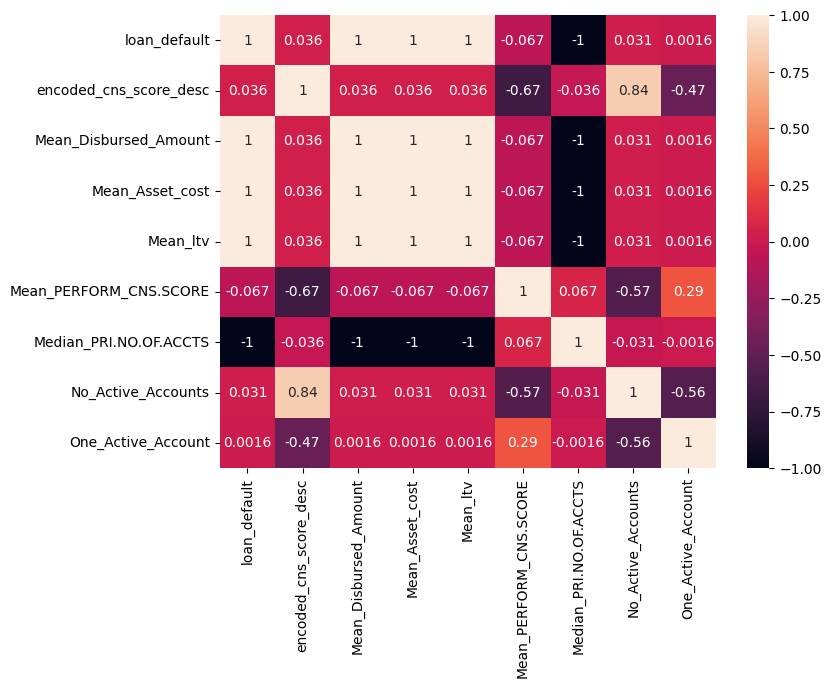

In [174]:
plt.figure(figsize = (8,6), dpi = 100)
sns.heatmap(dfg[['loan_default', 'encoded_cns_score_desc', 'Mean_Disbursed_Amount',
       'Mean_Asset_cost', 'Mean_ltv', 'Mean_PERFORM_CNS.SCORE',
       'Median_PRI.NO.OF.ACCTS', 'No_Active_Accounts', 'One_Active_Account']].corr(), annot = True)
plt.show()

In [175]:
#PRI.OVERDUE.ACCTS

In [176]:
dfg['PRI.OVERDUE.ACCTS'].skew()

7.868142752652513

In [177]:
round(dfg.groupby('loan_default')['PRI.OVERDUE.ACCTS'].median(),2)

loan_default
0    0
1    0
Name: PRI.OVERDUE.ACCTS, dtype: int64

In [178]:
dfg[['PRI.OVERDUE.ACCTS', 'loan_default']].corr()

,PRI.OVERDUE.ACCTS,loan_default
PRI.OVERDUE.ACCTS,1.000000,0.033428
loan_default,0.033428,1.000000


In [179]:
# as you can see this column is not correlated with the target column

In [180]:
dfg['col'] = dfg['PRI.OVERDUE.ACCTS']

In [181]:
import statsmodels.formula.api as sma

C:\Users\Tusha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [182]:
model = sma.ols('loan_default ~ col', data =dfg).fit()

In [183]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           loan_default   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     75.70
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.37e-18
Time:                        00:37:55   Log-Likelihood:                -36013.
No. Observations:               67671   AIC:                         7.203e+04
Df Residuals:                   67669   BIC:                         7.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2131      0.002    129.384      0.000       0.210       0.216
col            0.0246      0.003      8.701      0.000       0.019       0.030
==============================================================================
Omnibus:                    12556.314   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21223.836
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                       2.886   Cond. No.                         1.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
from statsmodels.stats.anova import anova_lm

In [185]:
print(anova_lm(model))

               df        sum_sq    mean_sq          F        PR(>F)
col           1.0     12.849496  12.849496  75.702036  3.371077e-18
Residual  67669.0  11485.986194   0.169738        NaN           NaN


In [186]:
from scipy.stats import ttest_ind

ttest_ind(dfg['loan_default'], dfg['PRI.OVERDUE.ACCTS'])

Ttest_indResult(statistic=21.252828414760867, pvalue=4.528345634194532e-100)

In [188]:
# as we can also see that pvalue < 0.05 this means PRI.OVERDUE.ACCTS is a signifcant column

In [189]:
dfg.drop('col', axis = 1, inplace = True)

In [190]:
#PRI.CURRENT.BALANCE

In [191]:
dfg['PRI.CURRENT.BALANCE'].skew()

35.54131584202848

In [192]:
round(dfg.groupby('loan_default')['PRI.CURRENT.BALANCE'].median(),2)

loan_default
0    0
1    0
Name: PRI.CURRENT.BALANCE, dtype: int64

In [193]:
dfg[['loan_default', 'PRI.CURRENT.BALANCE']].corr()

,loan_default,PRI.CURRENT.BALANCE
loan_default,1.000000,-0.027777
PRI.CURRENT.BALANCE,-0.027777,1.000000


In [194]:
round(dfg.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)

loan_default
0    187490.56
1    116556.04
Name: PRI.CURRENT.BALANCE, dtype: float64

In [195]:
dfg['Mean_PRI.CURRENT.BALANCE'] = round(dfg.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)[0]

In [196]:
b = dfg[dfg['loan_default'] == 1].index
b = list(b)
print(b)

[4, 14, 17, 20, 27, 29, 30, 35, 37, 38, 39, 56, 74, 86, 87, 99, 101, 109, 110, 111, 133, 135, 136, 138, 140, 149, 150, 153, 159, 164, 170, 172, 176, 181, 186, 196, 197, 201, 203, 220, 225, 226, 229, 235, 237, 240, 243, 245, 249, 254, 256, 270, 274, 277, 281, 291, 294, 300, 305, 306, 307, 309, 313, 318, 320, 322, 327, 336, 338, 343, 346, 352, 354, 356, 362, 368, 375, 383, 403, 404, 407, 414, 422, 424, 427, 430, 433, 434, 436, 437, 438, 449, 451, 453, 456, 461, 474, 478, 486, 496, 501, 504, 507, 515, 518, 525, 529, 531, 536, 537, 541, 550, 553, 555, 560, 561, 563, 564, 573, 582, 586, 588, 589, 590, 594, 603, 604, 605, 612, 614, 615, 616, 617, 625, 626, 631, 635, 638, 642, 646, 653, 656, 668, 670, 672, 678, 679, 682, 686, 689, 690, 694, 700, 710, 719, 724, 734, 739, 755, 758, 766, 772, 778, 786, 796, 805, 807, 810, 818, 819, 825, 833, 834, 837, 840, 841, 854, 868, 870, 874, 879, 882, 886, 888, 891, 902, 907, 914, 921, 925, 927, 928, 932, 934, 935, 936, 939, 949, 959, 961, 962, 968, 974, 9

In [197]:
dfg['Mean_PRI.CURRENT.BALANCE'].iloc[b] = round(dfg.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [198]:
dfg[['Mean_PRI.CURRENT.BALANCE','loan_default']][dfg['loan_default'] == 0].values

array([[187490.56,      0.  ],
       [187490.56,      0.  ],
       [187490.56,      0.  ],
       ...,
       [187490.56,      0.  ],
       [187490.56,      0.  ],
       [187490.56,      0.  ]])

In [199]:
dfg[['Mean_PRI.CURRENT.BALANCE','loan_default']][dfg['loan_default'] == 1].values

array([[1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       ...,
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00]])

In [200]:
# as you can see Mean_PRI.CURRENT.BALANCE has the mean value value of pri current balance wrt its loan default value in dfg dataframe


In [201]:
round(dft.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)

loan_default
0    187490.56
1    116556.04
Name: PRI.CURRENT.BALANCE, dtype: float64

In [202]:
dft['PRI.CURRENT.BALANCE'].iloc[c] = round(dft.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)[0]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [203]:
dft['PRI.CURRENT.BALANCE'].iloc[d] = round(dft.groupby('loan_default')['PRI.CURRENT.BALANCE'].mean(),2)[1]

In [204]:
dft[['PRI.CURRENT.BALANCE','loan_default']][dft['loan_default'] == 0].values

array([[187490.56,      0.  ],
       [187490.56,      0.  ],
       [187490.56,      0.  ],
       ...,
       [187490.56,      0.  ],
       [187490.56,      0.  ],
       [187490.56,      0.  ]])

In [205]:
dft[['PRI.CURRENT.BALANCE','loan_default']][dft['loan_default'] == 1].values

array([[1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       ...,
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00],
       [1.1655604e+05, 1.0000000e+00]])

In [582]:
#dfg.to_csv('dfg_wip.csv')

In [583]:
#dft.to_csv('dft_wip.csv')

In [206]:
print(dfg.shape)

(67671, 39)


In [207]:
print(dft.shape)

(67671, 33)


In [208]:
dft.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'No_Active_Accounts', 'One_Active_Account'],
      dtype='object')

In [209]:
dft.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT  

In [82]:
#dfg = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/dfg_wip.csv')
#dft = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/dft_wip.csv')

In [210]:
dfg.shape

(67671, 39)

In [211]:
dfg.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'encoded_cns_score_desc', 'Mean_Disbursed_Amount',
       'Mean_Asset_cost', 'Mean_ltv', 'Mean_PERFORM_CNS.SCORE',
       'Median_PRI.NO.OF.ACCTS', 'No_Active_Accounts', 'One_Active_Account',
       'Mean_PRI.CURRENT.BALANCE'],
      dtype='object')

In [212]:
#PRI.SANCTIONED.AMOUNT

In [213]:
dfg['PRI.SANCTIONED.AMOUNT'].skew()

33.522516379393856

In [214]:
dfg.groupby('loan_default')['PRI.SANCTIONED.AMOUNT'].median()

loan_default
0    0
1    0
Name: PRI.SANCTIONED.AMOUNT, dtype: int64

In [215]:
dfg['PRI.SANCTIONED.AMOUNT'].value_counts()

0         39735
50000       443
30000       436
25000       271
100000      266
          ...  
181309        1
177856        1
44080         1
67482         1
549200        1
Name: PRI.SANCTIONED.AMOUNT, Length: 15397, dtype: int64

In [216]:
dfg[['loan_default', 'PRI.SANCTIONED.AMOUNT']].corr()

,loan_default,PRI.SANCTIONED.AMOUNT
loan_default,1.000000,-0.030506
PRI.SANCTIONED.AMOUNT,-0.030506,1.000000


In [217]:
# as you can see PRI.SANCTIONED.AMOUNT column has no correlation with the loan_default column

In [218]:
dfg['col'] = dfg['PRI.SANCTIONED.AMOUNT']

In [219]:
import statsmodels.formula.api as sma

model2 = sma.ols('loan_default ~ col', data =dfg).fit()

model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           loan_default   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     63.03
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.06e-15
Time:                        00:49:02   Log-Likelihood:                -36019.
No. Observations:               67671   AIC:                         7.204e+04
Df Residuals:                   67669   BIC:                         7.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2192      0.002    136.387      0.000       0.216       0.222
col        -9.676e-09   1.22e-09     -7.939      0.000   -1.21e-08   -7.29e-09
==============================================================================
Omnibus:                    12565.066   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21241.711
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                       2.883   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
from statsmodels.stats.anova import anova_lm

print(anova_lm(model2))

               df        sum_sq    mean_sq          F        PR(>F)
col           1.0     10.701091  10.701091  63.033046  2.063667e-15
Residual  67669.0  11488.134599   0.169770        NaN           NaN


In [221]:
dfg.drop('col', axis = 1, inplace = True)

In [222]:
from scipy.stats import ttest_ind

In [223]:
ttest_ind(dfg['loan_default'], dfg['PRI.SANCTIONED.AMOUNT'])

Ttest_indResult(statistic=-44.616658638636096, pvalue=0.0)

In [224]:
# as you can see that pvalue is < 0.05. This means this column is a signifcant column wrt the target column

In [225]:
#PRI.DISBURSED.AMOUNT

In [226]:
dfg['PRI.DISBURSED.AMOUNT'].skew()

33.480940982731546

In [227]:
dfg.groupby('loan_default')['PRI.DISBURSED.AMOUNT'].median()

loan_default
0    0
1    0
Name: PRI.DISBURSED.AMOUNT, dtype: int64

In [228]:
ttest_ind(dfg['loan_default'], dfg['PRI.DISBURSED.AMOUNT'])

Ttest_indResult(statistic=-44.538770504248966, pvalue=0.0)

In [229]:
dfg[['loan_default', 'PRI.DISBURSED.AMOUNT']].corr()

,loan_default,PRI.DISBURSED.AMOUNT
loan_default,1.000000,-0.030262
PRI.DISBURSED.AMOUNT,-0.030262,1.000000


In [231]:
# as you can see that pvalue is < 0.05. This means this column is a signifcant column wrt the target column

In [232]:
# Also there's no correlation b/w PRI.DISBURSED.AMOUNT and loan_default also

In [233]:
#SEC.NO.OF.ACCTS

In [234]:
dfg['SEC.NO.OF.ACCTS'].skew()

30.134140978102174

In [235]:
round(dfg.groupby('loan_default')['SEC.NO.OF.ACCTS'].count(),2)

loan_default
0    52985
1    14686
Name: SEC.NO.OF.ACCTS, dtype: int64

In [236]:
b = dfg[dfg['loan_default'] == 1].index
b = list(b)
print(b)


[4, 14, 17, 20, 27, 29, 30, 35, 37, 38, 39, 56, 74, 86, 87, 99, 101, 109, 110, 111, 133, 135, 136, 138, 140, 149, 150, 153, 159, 164, 170, 172, 176, 181, 186, 196, 197, 201, 203, 220, 225, 226, 229, 235, 237, 240, 243, 245, 249, 254, 256, 270, 274, 277, 281, 291, 294, 300, 305, 306, 307, 309, 313, 318, 320, 322, 327, 336, 338, 343, 346, 352, 354, 356, 362, 368, 375, 383, 403, 404, 407, 414, 422, 424, 427, 430, 433, 434, 436, 437, 438, 449, 451, 453, 456, 461, 474, 478, 486, 496, 501, 504, 507, 515, 518, 525, 529, 531, 536, 537, 541, 550, 553, 555, 560, 561, 563, 564, 573, 582, 586, 588, 589, 590, 594, 603, 604, 605, 612, 614, 615, 616, 617, 625, 626, 631, 635, 638, 642, 646, 653, 656, 668, 670, 672, 678, 679, 682, 686, 689, 690, 694, 700, 710, 719, 724, 734, 739, 755, 758, 766, 772, 778, 786, 796, 805, 807, 810, 818, 819, 825, 833, 834, 837, 840, 841, 854, 868, 870, 874, 879, 882, 886, 888, 891, 902, 907, 914, 921, 925, 927, 928, 932, 934, 935, 936, 939, 949, 959, 961, 962, 968, 974, 9

In [237]:
dfg['SEC.NO.OF.ACCTS_count'] = dfg['SEC.NO.OF.ACCTS'].apply(lambda x: 'No_Acct' if x ==0 else 'One_Acct' if x ==1 else 'More_Than_one_Acct')

In [238]:
dfg['SEC.NO.OF.ACCTS_count'].value_counts()

No_Acct               65941
One_Acct               1022
More_Than_one_Acct      708
Name: SEC.NO.OF.ACCTS_count, dtype: int64

In [239]:
temp1 = pd.get_dummies(dfg['SEC.NO.OF.ACCTS_count'], drop_first = True)
temp1.head()

,No_Acct,One_Acct
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [240]:
dfg[['No_Sec_Acct', 'One_Sec_Acct']] = temp1[['No_Acct', 'One_Acct']]

In [241]:
dfg.drop('SEC.NO.OF.ACCTS_count', axis = 1, inplace = True)

In [242]:
dfg.drop('SEC.NO.OF.ACCTS', axis = 1, inplace = True)

In [243]:
#dfg.drop(['No_Acct', 'One_Acct'], axis = 1, inplace = True)

In [244]:
dfg.shape

(67671, 40)

In [245]:
dfg.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'encoded_cns_score_desc', 'Mean_Disbursed_Amount', 'Mean_Asset_cost',
       'Mean_ltv', 'Mean_PERFORM_CNS.SCORE', 'Median_PRI.NO.OF.ACCTS',
       'No_Active_Accounts', 'One_Active_Account', 'Mean_PRI.CURRENT.BALANCE',
       'No_Sec_Acct', 'One_Sec_Acct'],
      dtype='object')

In [246]:
c = dft[dft['loan_default'] == 0].index
c = list(c)
print(c)

d = dft[dft['loan_default'] == 1].index
d = list(d)
print(d)


[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 28, 31, 32, 33, 34, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 169, 171, 173, 174, 175, 177, 178, 179, 180, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 227, 228, 230, 231, 232, 233, 234, 236, 238, 239, 241, 242, 244, 246, 247, 248, 250, 251, 252, 253, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 26

In [247]:
dft['SEC.NO.OF.ACCTS_count'] = dft['SEC.NO.OF.ACCTS'].apply(lambda x: 'No_Acct' if x ==0 else 'One_Acct' if x ==1 else 'More_Than_one_Acct')

dft['SEC.NO.OF.ACCTS_count'].value_counts()


No_Acct               65941
One_Acct               1022
More_Than_one_Acct      708
Name: SEC.NO.OF.ACCTS_count, dtype: int64

In [248]:
temp2 = pd.get_dummies(dft['SEC.NO.OF.ACCTS_count'], drop_first = True)
temp2.head()


,No_Acct,One_Acct
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [249]:
dft[['No_Sec_Acct', 'One_Sec_Acct']] = temp1[['No_Acct', 'One_Acct']]

dft.drop('SEC.NO.OF.ACCTS_count', axis = 1, inplace = True)

dft.drop('SEC.NO.OF.ACCTS', axis = 1, inplace = True)

In [250]:
dft.shape

(67671, 34)

In [251]:
#SEC.ACTIVE.ACCTS

In [252]:
dfg['SEC.ACTIVE.ACCTS'].skew()

24.15191217754906

In [253]:
round(dfg.groupby('loan_default')['SEC.ACTIVE.ACCTS'].median(),2)

loan_default
0    0
1    0
Name: SEC.ACTIVE.ACCTS, dtype: int64

In [254]:
dfg['SEC.ACTIVE.ACCTS_count'] = dfg['SEC.ACTIVE.ACCTS'].apply(lambda x: 'No_Acct' if x ==0 else 'One_Acct' if x ==1 else 'More_Than_one_Acct')

dfg['SEC.ACTIVE.ACCTS_count'].value_counts()

No_Acct               66548
One_Acct                797
More_Than_one_Acct      326
Name: SEC.ACTIVE.ACCTS_count, dtype: int64

In [255]:
temp3 = pd.get_dummies(dfg['SEC.ACTIVE.ACCTS_count'], drop_first = True)
temp3.head()

,No_Acct,One_Acct
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [256]:
dfg[['No_Sec_Active_Acct', 'One_Sec_Active_Acct']] = temp3[['No_Acct', 'One_Acct']]

dfg.drop('SEC.ACTIVE.ACCTS_count', axis = 1, inplace = True)

dfg.drop('SEC.ACTIVE.ACCTS', axis = 1, inplace = True)

In [257]:
dfg.shape

(67671, 41)

In [258]:
dfg.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'encoded_cns_score_desc', 'Mean_Disbursed_Amount', 'Mean_Asset_cost',
       'Mean_ltv', 'Mean_PERFORM_CNS.SCORE', 'Median_PRI.NO.OF.ACCTS',
       'No_Active_Accounts', 'One_Active_Account', 'Mean_PRI.CURRENT.BALANCE',
       'No_Sec_Acct', 'One_Sec_Acct', 'No_Sec_Active_Acct',
       'One_Sec_Active_Acct'],
      dtype='object')

In [259]:
dft['SEC.ACTIVE.ACCTS_count'] = dft['SEC.ACTIVE.ACCTS'].apply(lambda x: 'No_Acct' if x ==0 else 'One_Acct' if x ==1 else 'More_Than_one_Acct')

dft['SEC.ACTIVE.ACCTS_count'].value_counts()

No_Acct               66548
One_Acct                797
More_Than_one_Acct      326
Name: SEC.ACTIVE.ACCTS_count, dtype: int64

In [260]:
temp4 = pd.get_dummies(dft['SEC.ACTIVE.ACCTS_count'], drop_first = True)
temp4.head()

,No_Acct,One_Acct
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [261]:
dft[['No_Sec_Active_Acct', 'One_Sec_Active_Acct']] = temp4[['No_Acct', 'One_Acct']]

dft.drop('SEC.ACTIVE.ACCTS_count', axis = 1, inplace = True)

dft.drop('SEC.ACTIVE.ACCTS', axis = 1, inplace = True)

In [262]:
dft.shape

(67671, 35)

In [263]:
dft.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'No_Active_Accounts', 'One_Active_Account',
       'No_Sec_Acct', 'One_Sec_Acct', 'No_Sec_Active_Acct',
       'One_Sec_Active_Acct'],
      dtype='object')

In [264]:
#SEC.OVERDUE.ACCTS

In [265]:
dfg['SEC.OVERDUE.ACCTS'].skew()

22.86259885710575

In [266]:
dfg[['loan_default', 'SEC.OVERDUE.ACCTS']].corr()

,loan_default,SEC.OVERDUE.ACCTS
loan_default,1.000000,-0.000041
SEC.OVERDUE.ACCTS,-0.000041,1.000000


In [267]:
dfg['col'] = dfg['SEC.OVERDUE.ACCTS']

import statsmodels.formula.api as sma

model3 = sma.ols('loan_default ~ col', data =dfg).fit()

model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           loan_default   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001120
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.992
Time:                        01:06:12   Log-Likelihood:                -36051.
No. Observations:               67671   AIC:                         7.211e+04
Df Residuals:                   67669   BIC:                         7.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2170      0.002    136.650      0.000       0.214       0.220
col           -0.0002      0.015     -0.011      0.992      -0.029       0.028
==============================================================================
Omnibus:                    12585.903   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21297.587
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                       2.885   Cond. No.                         9.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
from statsmodels.stats.anova import anova_lm

print(anova_lm(model3))

dfg.drop('col', axis = 1, inplace = True)



               df        sum_sq   mean_sq         F    PR(>F)
col           1.0      0.000019  0.000019  0.000112  0.991554
Residual  67669.0  11498.835671  0.169928       NaN       NaN


In [269]:
from scipy.stats import ttest_ind

ttest_ind(dfg['loan_default'], dfg['SEC.OVERDUE.ACCTS'])

Ttest_indResult(statistic=128.03875217933725, pvalue=0.0)

In [270]:
# as you can see that rsq is zero and pvalue is < 0.05. This means this column is a signifcant also wrt the target column

In [271]:
#SEC.CURRENT.BALANCE

In [272]:
dfg['SEC.CURRENT.BALANCE'].skew()

56.790927223853885

In [273]:
dfg.groupby('loan_default')['SEC.CURRENT.BALANCE'].median()

loan_default
0    0
1    0
Name: SEC.CURRENT.BALANCE, dtype: int64

In [274]:
round(dfg.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)

loan_default
0    5003.66
1    3896.07
Name: SEC.CURRENT.BALANCE, dtype: float64

In [275]:
dfg['Mean_SEC.CURRENT.BALANCE'] = round(dfg.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)[0]

In [276]:
dfg['Mean_SEC.CURRENT.BALANCE'].iloc[b] = round(dfg.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [277]:
dfg[['Mean_SEC.CURRENT.BALANCE','loan_default']][dfg['loan_default'] == 0].values

array([[5003.66,    0.  ],
       [5003.66,    0.  ],
       [5003.66,    0.  ],
       ...,
       [5003.66,    0.  ],
       [5003.66,    0.  ],
       [5003.66,    0.  ]])

In [278]:
dfg[['Mean_SEC.CURRENT.BALANCE','loan_default']][dfg['loan_default'] == 1].values

array([[3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       ...,
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00]])

In [279]:
# as you can see mean_SEC.CURRENT.BALANCE has the mean value value of SEC.CURRENT.BALANCE wrt its loan default value in dfg dataframe

In [280]:
round(dft.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)

loan_default
0    5003.66
1    3896.07
Name: SEC.CURRENT.BALANCE, dtype: float64

In [281]:
dft['SEC.CURRENT.BALANCE'].iloc[c] = round(dft.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)[0]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [282]:
dft['SEC.CURRENT.BALANCE'].iloc[d] = round(dft.groupby('loan_default')['SEC.CURRENT.BALANCE'].mean(),2)[1]

In [283]:
dft[['SEC.CURRENT.BALANCE','loan_default']][dft['loan_default'] == 0].values

array([[5003.66,    0.  ],
       [5003.66,    0.  ],
       [5003.66,    0.  ],
       ...,
       [5003.66,    0.  ],
       [5003.66,    0.  ],
       [5003.66,    0.  ]])

In [284]:
dft[['SEC.CURRENT.BALANCE','loan_default']][dft['loan_default'] == 1].values

array([[3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       ...,
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00],
       [3.89607e+03, 1.00000e+00]])

In [285]:
#data = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/dfg_wip.csv')

In [286]:
#SEC.SANCTIONED.AMOUNT

In [287]:
dfg['SEC.SANCTIONED.AMOUNT'].skew()

47.70433508762409

In [288]:
dfg[['loan_default', 'SEC.SANCTIONED.AMOUNT']].corr()



,loan_default,SEC.SANCTIONED.AMOUNT
loan_default,1.000000,-0.004872
SEC.SANCTIONED.AMOUNT,-0.004872,1.000000


In [289]:
dfg['col'] = dfg['SEC.SANCTIONED.AMOUNT']

import statsmodels.formula.api as sma

model4 = sma.ols('loan_default ~ col', data =dfg).fit()

model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           loan_default   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.606
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.205
Time:                        01:10:33   Log-Likelihood:                -36050.
No. Observations:               67671   AIC:                         7.210e+04
Df Residuals:                   67669   BIC:                         7.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2171      0.002    136.871      0.000       0.214       0.220
col        -1.405e-08   1.11e-08     -1.267      0.205   -3.58e-08    7.68e-09
==============================================================================
Omnibus:                    12585.421   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21296.399
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                       2.885   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
from statsmodels.stats.anova import anova_lm

print(anova_lm(model4))

dfg.drop('col', axis = 1, inplace = True)


               df        sum_sq   mean_sq         F    PR(>F)
col           1.0      0.272925  0.272925  1.606163  0.205036
Residual  67669.0  11498.562765  0.169924       NaN       NaN


In [291]:
from scipy.stats import ttest_ind

ttest_ind(dfg['loan_default'], dfg['SEC.SANCTIONED.AMOUNT'])


Ttest_indResult(statistic=-11.80009243967225, pvalue=4.042965293442834e-32)

In [292]:
# as you can see that rsq is zero and pvalue is < 0.05. This means this column is a signifcant also wrt the target column

In [293]:
dfg.groupby('loan_default')['SEC.SANCTIONED.AMOUNT'].median()

loan_default
0    0
1    0
Name: SEC.SANCTIONED.AMOUNT, dtype: int64

In [294]:
dfg['SEC.SANCTIONED.AMOUNT'].value_counts()

0         66574
50000        25
100000       19
40000        13
30000        11
          ...  
42986         1
48510         1
11500         1
29863         1
806761        1
Name: SEC.SANCTIONED.AMOUNT, Length: 769, dtype: int64

In [295]:
dfg['SEC.SANCTIONED.AMOUNT_cat'] = dfg['SEC.SANCTIONED.AMOUNT'].apply(lambda x: 'Zero_Sanct_Amt' if x ==0 else 'Non_Zero_Sanct_Amt')

In [296]:
temp3 = pd.get_dummies(dfg['SEC.SANCTIONED.AMOUNT_cat'])
temp3.head()

,Non_Zero_Sanct_Amt,Zero_Sanct_Amt
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [297]:
dfg[['Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt']] = temp3[['Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt']]

In [298]:
dfg.drop(['SEC.SANCTIONED.AMOUNT_cat', 'SEC.SANCTIONED.AMOUNT'], axis = 1, inplace = True)

In [299]:
dfg.shape

(67671, 43)

In [300]:
dft['SEC.SANCTIONED.AMOUNT'].value_counts()

0         66574
50000        25
100000       19
40000        13
30000        11
          ...  
42986         1
48510         1
11500         1
29863         1
806761        1
Name: SEC.SANCTIONED.AMOUNT, Length: 769, dtype: int64

In [301]:
dft['SEC.SANCTIONED.AMOUNT_cat'] = dft['SEC.SANCTIONED.AMOUNT'].apply(lambda x: 'Zero_Sanct_Amt' if x ==0 else 'Non_Zero_Sanct_Amt')

In [302]:
temp4 = pd.get_dummies(dft['SEC.SANCTIONED.AMOUNT_cat'])
temp4.head()

,Non_Zero_Sanct_Amt,Zero_Sanct_Amt
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [303]:
dft[['Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt']] = temp3[['Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt']]

In [304]:
dft.drop(['SEC.SANCTIONED.AMOUNT_cat', 'SEC.SANCTIONED.AMOUNT'], axis = 1, inplace = True)

In [305]:
dft.shape

(67671, 36)

In [306]:
dft.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'No_Active_Accounts', 'One_Active_Account', 'No_Sec_Acct',
       'One_Sec_Acct', 'No_Sec_Active_Acct', 'One_Sec_Active_Acct',
       'Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt'],
      dtype='object')

In [307]:
dfg.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'encoded_cns_score_desc', 'Mean_Disbursed_Amount',
       'Mean_Asset_cost', 'Mean_ltv', 'Mean_PERFORM_CNS.SCORE',
       'Median_PRI.NO.OF.ACCTS', 'No_Active_Accounts', 'One_Active_Account',
       'Mean_PRI.CURRENT.BALANCE', 'No_Sec_Acct', 'One_Sec_Acct',
       'No_Sec_Active_Acct', 'One_Sec_Active_Acct', 'Mean_SEC.CURRENT.BALANCE',
       'Non_Zero_Sanct_Amt', 'Zero_Sanct_Amt'],
  

In [308]:
#SEC.DISBURSED.AMOUNT

In [309]:
dfg['SEC.DISBURSED.AMOUNT'].skew()

47.97336664739066

In [310]:
dfg['SEC.DISBURSED.AMOUNT'].value_counts()

0         66580
50000        17
100000       14
300000       11
500000       11
          ...  
3940          1
12000         1
44400         1
79171         1
42859         1
Name: SEC.DISBURSED.AMOUNT, Length: 846, dtype: int64

In [311]:
dfg['SEC.DISBURSED.AMOUNT_cat'] = dfg['SEC.DISBURSED.AMOUNT'].apply(lambda x: 'Zero_Disbursed' if x == 0 else 'Non_Zero_Disbursed')

In [312]:
dfg['SEC.DISBURSED.AMOUNT_cat'].value_counts()

Zero_Disbursed        66580
Non_Zero_Disbursed     1091
Name: SEC.DISBURSED.AMOUNT_cat, dtype: int64

In [313]:
temp5 = pd.get_dummies(dfg['SEC.DISBURSED.AMOUNT_cat'])
temp5.head()

,Non_Zero_Disbursed,Zero_Disbursed
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [314]:
dfg[['Non_Zero_Disbursed','Zero_Disbursed']] = temp5[['Non_Zero_Disbursed','Zero_Disbursed']]

In [315]:
dfg.drop(['SEC.DISBURSED.AMOUNT_cat', 'SEC.DISBURSED.AMOUNT'], axis = 1, inplace = True)

In [316]:
dfg.shape

(67671, 44)

In [317]:
dft['SEC.DISBURSED.AMOUNT'].value_counts()

0         66580
50000        17
100000       14
300000       11
500000       11
          ...  
3940          1
12000         1
44400         1
79171         1
42859         1
Name: SEC.DISBURSED.AMOUNT, Length: 846, dtype: int64

In [318]:
dft['SEC.DISBURSED.AMOUNT_cat'] = dft['SEC.DISBURSED.AMOUNT'].apply(lambda x: 'Zero_Disbursed' if x == 0 else 'Non_Zero_Disbursed')

In [319]:
dft['SEC.DISBURSED.AMOUNT_cat'].value_counts()

Zero_Disbursed        66580
Non_Zero_Disbursed     1091
Name: SEC.DISBURSED.AMOUNT_cat, dtype: int64

In [320]:
temp6 = pd.get_dummies(dft['SEC.DISBURSED.AMOUNT_cat'])
temp6.head()

,Non_Zero_Disbursed,Zero_Disbursed
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [321]:
dft[['Non_Zero_Disbursed','Zero_Disbursed']] = temp6[['Non_Zero_Disbursed','Zero_Disbursed']]

In [322]:
dft.drop(['SEC.DISBURSED.AMOUNT_cat', 'SEC.DISBURSED.AMOUNT'], axis = 1, inplace = True)

In [323]:
dft.shape

(67671, 37)

In [324]:
#PRI.SANCTIONED.AMOUNT

In [325]:
dfg['PRI.SANCTIONED.AMOUNT'].skew()

33.522516379393856

In [326]:
dfg.groupby('loan_default')['PRI.SANCTIONED.AMOUNT'].median()

loan_default
0    0
1    0
Name: PRI.SANCTIONED.AMOUNT, dtype: int64

In [327]:
dfg['PRI.SANCTIONED.AMOUNT'].value_counts()

0         39735
50000       443
30000       436
25000       271
100000      266
          ...  
181309        1
177856        1
44080         1
67482         1
549200        1
Name: PRI.SANCTIONED.AMOUNT, Length: 15397, dtype: int64

In [328]:
dfg['PRI.SANCTIONED.AMOUNT_cat'] = dfg['PRI.SANCTIONED.AMOUNT'].apply(lambda x: 'Zero_Pri_Sanct' if x == 0 else 'Non_Zero_Pri_Sanct')

In [329]:
temp6 = pd.get_dummies(dfg['PRI.SANCTIONED.AMOUNT_cat'])
temp6.head()

,Non_Zero_Pri_Sanct,Zero_Pri_Sanct
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [330]:
dfg[['Non_Zero_Pri_Sanct','Zero_Pri_Sanct']] = temp6[['Non_Zero_Pri_Sanct','Zero_Pri_Sanct']]

In [331]:
dfg.drop(['PRI.SANCTIONED.AMOUNT_cat', 'PRI.SANCTIONED.AMOUNT'], axis = 1, inplace = True)

In [332]:
dfg.shape

(67671, 45)

In [333]:
dft['PRI.SANCTIONED.AMOUNT'].value_counts()

0         39735
50000       443
30000       436
25000       271
100000      266
          ...  
181309        1
177856        1
44080         1
67482         1
549200        1
Name: PRI.SANCTIONED.AMOUNT, Length: 15397, dtype: int64

In [334]:
dft['PRI.SANCTIONED.AMOUNT_cat'] = dft['PRI.SANCTIONED.AMOUNT'].apply(lambda x: 'Zero_Pri_Sanct' if x == 0 else 'Non_Zero_Pri_Sanct')

In [335]:
temp7 = pd.get_dummies(dft['PRI.SANCTIONED.AMOUNT_cat'])
temp7.head()

,Non_Zero_Pri_Sanct,Zero_Pri_Sanct
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [336]:
dft[['Non_Zero_Pri_Sanct','Zero_Pri_Sanct']] = temp7[['Non_Zero_Pri_Sanct','Zero_Pri_Sanct']]

In [337]:
dft.drop(['PRI.SANCTIONED.AMOUNT_cat', 'PRI.SANCTIONED.AMOUNT'], axis = 1, inplace = True)

In [338]:
dft.shape

(67671, 38)

In [339]:
#PRI.DISBURSED.AMOUNT

In [340]:
dfg['PRI.DISBURSED.AMOUNT'].skew()

33.480940982731546

In [341]:
dfg.groupby('loan_default')['PRI.DISBURSED.AMOUNT'].median()

loan_default
0    0
1    0
Name: PRI.DISBURSED.AMOUNT, dtype: int64

In [342]:
dfg['PRI.DISBURSED.AMOUNT'].value_counts()

0         39756
50000       418
30000       404
100000      260
40000       236
          ...  
34999         1
563381        1
348134        1
149679        1
22571         1
Name: PRI.DISBURSED.AMOUNT, Length: 16366, dtype: int64

In [343]:
dfg['PRI.DISBURSED.AMOUNT_cat'] = dfg['PRI.DISBURSED.AMOUNT'].apply(lambda x: 'Zero_Pri_Disbursed' if x == 0 else 'Non_Zero_Pri_Disbursed')

In [344]:
temp8 = pd.get_dummies(dfg['PRI.DISBURSED.AMOUNT_cat'])
temp8.head()

,Non_Zero_Pri_Disbursed,Zero_Pri_Disbursed
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [345]:
dfg[['Non_Zero_Pri_Disbursed', 'Zero_Pri_Disbursed']] = temp8[['Non_Zero_Pri_Disbursed', 'Zero_Pri_Disbursed']]

In [346]:
dfg.drop(['PRI.DISBURSED.AMOUNT_cat', 'PRI.DISBURSED.AMOUNT'], axis = 1, inplace = True)

In [347]:
dfg.shape

(67671, 46)

In [348]:
dft['PRI.DISBURSED.AMOUNT'].value_counts()

0         39756
50000       418
30000       404
100000      260
40000       236
          ...  
34999         1
563381        1
348134        1
149679        1
22571         1
Name: PRI.DISBURSED.AMOUNT, Length: 16366, dtype: int64

In [349]:
dft['PRI.DISBURSED.AMOUNT_cat'] = dft['PRI.DISBURSED.AMOUNT'].apply(lambda x: 'Zero_Pri_Disbursed' if x == 0 else 'Non_Zero_Pri_Disbursed')

In [350]:
temp9 = pd.get_dummies(dft['PRI.DISBURSED.AMOUNT_cat'])
temp9.head()

,Non_Zero_Pri_Disbursed,Zero_Pri_Disbursed
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [351]:
dft[['Non_Zero_Pri_Disbursed', 'Zero_Pri_Disbursed']] = temp9[['Non_Zero_Pri_Disbursed', 'Zero_Pri_Disbursed']]

In [352]:
dft.drop(['PRI.DISBURSED.AMOUNT_cat', 'PRI.DISBURSED.AMOUNT'], axis = 1, inplace = True)

In [353]:
dft.shape

(67671, 39)

In [354]:
#PRIMARY.INSTAL.AMT

In [355]:
dfg['PRIMARY.INSTAL.AMT'].skew()

58.64027168636032

In [356]:
dfg.groupby('loan_default')['PRIMARY.INSTAL.AMT'].median()

loan_default
0    0
1    0
Name: PRIMARY.INSTAL.AMT, dtype: int64

In [357]:
dfg[dfg['loan_default'] == 1]['PRIMARY.INSTAL.AMT'].sum()

140836568

In [358]:
dfg[dfg['loan_default'] == 0]['PRIMARY.INSTAL.AMT'].sum()

747467024

In [359]:
dfg['PRIMARY.INSTAL.AMT_sum'] = dfg[dfg['loan_default'] == 0]['PRIMARY.INSTAL.AMT'].sum()

In [360]:
dfg['PRIMARY.INSTAL.AMT_sum'].iloc[b] = dfg[dfg['loan_default'] == 1]['PRIMARY.INSTAL.AMT'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [361]:
dfg['PRIMARY.INSTAL.AMT_sum'].value_counts()

747467024    52985
140836568    14686
Name: PRIMARY.INSTAL.AMT_sum, dtype: int64

In [362]:
dfg[dfg['loan_default'] == 0]['PRIMARY.INSTAL.AMT_sum'].values

array([747467024, 747467024, 747467024, ..., 747467024, 747467024,
       747467024], dtype=int64)

In [363]:
dfg[dfg['loan_default'] == 1]['PRIMARY.INSTAL.AMT_sum'].values

array([140836568, 140836568, 140836568, ..., 140836568, 140836568,
       140836568], dtype=int64)

In [364]:
# values are mapped correctly

In [365]:
dfg[['PRIMARY.INSTAL.AMT_sum','loan_default']].corr()

,PRIMARY.INSTAL.AMT_sum,loan_default
PRIMARY.INSTAL.AMT_sum,1.0,-1.0
loan_default,-1.0,1.0


In [366]:
dft[dft['loan_default'] == 1]['PRIMARY.INSTAL.AMT'].sum()

140836568

In [367]:
dft[dft['loan_default'] == 0]['PRIMARY.INSTAL.AMT'].sum()

747467024

In [368]:
dft['PRIMARY.INSTAL.AMT'].iloc[c] = dft[dft['loan_default'] == 0]['PRIMARY.INSTAL.AMT'].sum()

dft['PRIMARY.INSTAL.AMT'].iloc[d] = dft[dft['loan_default'] == 1]['PRIMARY.INSTAL.AMT'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [369]:
dft[dft['loan_default'] == 0]['PRIMARY.INSTAL.AMT'].values

array([747467024, 747467024, 747467024, ..., 747467024, 747467024,
       747467024], dtype=int64)

In [370]:
dft[dft['loan_default'] == 1]['PRIMARY.INSTAL.AMT'].values

array([140836568, 140836568, 140836568, ..., 140836568, 140836568,
       140836568], dtype=int64)

In [371]:
#values are mapped correctly

In [372]:
#SEC.INSTAL.AMT

In [373]:
dfg['SEC.INSTAL.AMT'].skew()

91.73760216957366

In [374]:
dfg.groupby('loan_default')['SEC.INSTAL.AMT'].median()

loan_default
0    0
1    0
Name: SEC.INSTAL.AMT, dtype: int64

In [375]:
dfg[dfg['loan_default'] == 1]['SEC.INSTAL.AMT'].sum()

5941293

In [376]:
dfg[dfg['loan_default'] == 0]['SEC.INSTAL.AMT'].sum()

11787222

In [377]:
dfg['SEC.INSTAL.AMT_sum'] = dfg[dfg['loan_default'] == 0]['SEC.INSTAL.AMT'].sum()

dfg['SEC.INSTAL.AMT_sum'].iloc[b] = dfg[dfg['loan_default'] == 1]['SEC.INSTAL.AMT'].sum()


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [378]:
dfg['SEC.INSTAL.AMT_sum'].value_counts()


11787222    52985
5941293     14686
Name: SEC.INSTAL.AMT_sum, dtype: int64

In [379]:
dfg[dfg['loan_default'] == 0]['SEC.INSTAL.AMT_sum'].values

array([11787222, 11787222, 11787222, ..., 11787222, 11787222, 11787222],
      dtype=int64)

In [380]:
dfg[dfg['loan_default'] == 1]['SEC.INSTAL.AMT_sum'].values

array([5941293, 5941293, 5941293, ..., 5941293, 5941293, 5941293],
      dtype=int64)

In [381]:
# values are mapped correctly

In [382]:
dft['SEC.INSTAL.AMT'].iloc[c] = dft[dft['loan_default'] == 0]['SEC.INSTAL.AMT'].sum()

dft['SEC.INSTAL.AMT'].iloc[d] = dft[dft['loan_default'] == 1]['SEC.INSTAL.AMT'].sum()


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [383]:
dft[dft['loan_default'] == 0]['SEC.INSTAL.AMT'].values

array([11787222, 11787222, 11787222, ..., 11787222, 11787222, 11787222],
      dtype=int64)

In [384]:
dft[dft['loan_default'] == 1]['SEC.INSTAL.AMT'].values

array([5941293, 5941293, 5941293, ..., 5941293, 5941293, 5941293],
      dtype=int64)

In [385]:
#NEW.ACCTS.IN.LAST.SIX.MONTHS

In [386]:
dfg['NEW.ACCTS.IN.LAST.SIX.MONTHS'].skew()

5.051336825152241

In [387]:
dfg.groupby('loan_default')['NEW.ACCTS.IN.LAST.SIX.MONTHS'].median()

loan_default
0    0
1    0
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [388]:
dfg['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     52313
1      9453
2      3397
3      1322
4       569
5       257
6       154
7        94
8        38
9        29
10       14
11       12
14        5
12        4
13        3
17        3
23        1
16        1
21        1
35        1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [389]:
dfg[dfg['loan_default'] == 0]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

21577

In [390]:
dfg[dfg['loan_default'] == 1]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

4919

In [391]:
dfg['NEW.ACCTS.IN.LAST.SIX.MONTHS_sum'] = dfg[dfg['loan_default'] == 0]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

In [392]:
dfg['NEW.ACCTS.IN.LAST.SIX.MONTHS_sum'].iloc[b] = dfg[dfg['loan_default'] == 1]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [394]:
dfg[dfg['loan_default'] == 0]['NEW.ACCTS.IN.LAST.SIX.MONTHS_sum'].values

array([21577, 21577, 21577, ..., 21577, 21577, 21577], dtype=int64)

In [396]:
dfg[dfg['loan_default'] == 1]['NEW.ACCTS.IN.LAST.SIX.MONTHS_sum'].values

array([4919, 4919, 4919, ..., 4919, 4919, 4919], dtype=int64)

In [397]:
#values are mapped correctly

In [398]:
dft['NEW.ACCTS.IN.LAST.SIX.MONTHS'].iloc[c] = dft[dft['loan_default'] == 0]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

dft['NEW.ACCTS.IN.LAST.SIX.MONTHS'].iloc[d] = dft[dft['loan_default'] == 1]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [399]:
dft[dft['loan_default'] == 0]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].values

array([21577, 21577, 21577, ..., 21577, 21577, 21577], dtype=int64)

In [400]:
dft[dft['loan_default'] == 1]['NEW.ACCTS.IN.LAST.SIX.MONTHS'].values

array([4919, 4919, 4919, ..., 4919, 4919, 4919], dtype=int64)

In [401]:
# values are mapped correctly

In [402]:
#DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [403]:
dfg['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].skew()

7.693600891242824

In [404]:
dfg.groupby('loan_default')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].median()

loan_default
0    0
1    0
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [405]:
dfg['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     62376
1      4324
2       739
3       166
4        34
6        11
5        10
7         5
9         2
8         2
20        1
12        1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [406]:
dfg[dfg['loan_default'] == 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()

4879

In [407]:
dfg[dfg['loan_default'] == 1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()

1774

In [408]:
dfg['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_sum'] = dfg[dfg['loan_default'] == 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()

dfg['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_sum'].iloc[b] = dfg[dfg['loan_default'] == 1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [409]:
dfg[dfg['loan_default'] == 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_sum'].values

array([4879, 4879, 4879, ..., 4879, 4879, 4879], dtype=int64)

In [410]:
dfg[dfg['loan_default'] == 1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_sum'].values

array([1774, 1774, 1774, ..., 1774, 1774, 1774], dtype=int64)

In [411]:
#values are mapped correctly

In [412]:
dft['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].iloc[c] = dft[dft['loan_default'] == 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()

dft['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].iloc[d] = dft[dft['loan_default'] == 1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].sum()


C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [413]:
dft[dft['loan_default'] == 0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].values

array([4879, 4879, 4879, ..., 4879, 4879, 4879], dtype=int64)

In [414]:
dft[dft['loan_default'] == 1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].values

array([1774, 1774, 1774, ..., 1774, 1774, 1774], dtype=int64)

In [415]:
# values are mapped correctly

In [416]:
#AVERAGE.ACCT.AGE

In [417]:
dfg['AVERAGE.ACCT.AGE'].skew()

3.296495930636679

In [418]:
dfg.groupby('loan_default')['AVERAGE.ACCT.AGE'].median()

loan_default
0    0.083333
1    0.000000
Name: AVERAGE.ACCT.AGE, dtype: float64

In [419]:
dfg['AVERAGE.ACCT.AGE_median'] = dfg.groupby('loan_default')['AVERAGE.ACCT.AGE'].median()[0]

In [420]:
dfg['AVERAGE.ACCT.AGE_median'].iloc[b] = dfg.groupby('loan_default')['AVERAGE.ACCT.AGE'].median()[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [421]:
dfg[dfg['loan_default'] == 0]['AVERAGE.ACCT.AGE_median'].values

array([0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
       0.08333333])

In [422]:
dfg[dfg['loan_default'] == 1]['AVERAGE.ACCT.AGE_median'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [423]:
#values are mapped correctly

In [424]:
dft['AVERAGE.ACCT.AGE'].iloc[c] = dft.groupby('loan_default')['AVERAGE.ACCT.AGE'].median()[0]
dft['AVERAGE.ACCT.AGE'].iloc[d] = dft.groupby('loan_default')['AVERAGE.ACCT.AGE'].median()[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [425]:
dft[dft['loan_default'] == 0]['AVERAGE.ACCT.AGE'].values

array([0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
       0.08333333])

In [426]:
dft[dft['loan_default'] == 1]['AVERAGE.ACCT.AGE'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [427]:
#values are mapped correctly

In [428]:
#CREDIT.HISTORY.LENGTH

In [429]:
dfg['CREDIT.HISTORY.LENGTH'].skew()

2.9434680385522385

In [430]:
dfg.groupby('loan_default')['CREDIT.HISTORY.LENGTH'].median()

loan_default
0    0.083333
1    0.000000
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [431]:
# since CREDIT.HISTORY.LENGTH has same median values like AVERAGE.ACCT.AGE. therefore, it makes no 
# difference to impute with median value of it in a new column. Because it will unneccesary increase
# cardinality

In [432]:
dfg.drop('CREDIT.HISTORY.LENGTH', axis = 1, inplace = True)
dft.drop('CREDIT.HISTORY.LENGTH', axis = 1, inplace = True)

In [433]:
#NO.OF_INQUIRIES

In [434]:
dfg['NO.OF_INQUIRIES'].skew()

6.307826276200791

In [435]:
dfg.groupby('loan_default')['NO.OF_INQUIRIES'].median()

loan_default
0    0
1    0
Name: NO.OF_INQUIRIES, dtype: int64

In [436]:
dfg[dfg['loan_default'] == 0]['NO.OF_INQUIRIES'].sum()

10289

In [437]:
dfg[dfg['loan_default'] == 1]['NO.OF_INQUIRIES'].sum()

3881

In [438]:
dfg['NO.OF_INQUIRIES_sum'] = dfg[dfg['loan_default'] == 0]['NO.OF_INQUIRIES'].sum()

In [439]:
dfg['NO.OF_INQUIRIES_sum'].iloc[b] = dfg[dfg['loan_default'] == 1]['NO.OF_INQUIRIES'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [440]:
dfg[dfg['loan_default'] == 0]['NO.OF_INQUIRIES_sum'].values

array([10289, 10289, 10289, ..., 10289, 10289, 10289], dtype=int64)

In [441]:
dfg[dfg['loan_default'] == 1]['NO.OF_INQUIRIES_sum'].values

array([3881, 3881, 3881, ..., 3881, 3881, 3881], dtype=int64)

In [442]:
#values are mapped correctly

In [443]:
dft['NO.OF_INQUIRIES'].iloc[c] = dft[dft['loan_default'] == 0]['NO.OF_INQUIRIES'].sum()

dft['NO.OF_INQUIRIES'].iloc[d] = dft[dft['loan_default'] == 1]['NO.OF_INQUIRIES'].sum()

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [444]:
dft[dft['loan_default'] == 0]['NO.OF_INQUIRIES'].values

array([10289, 10289, 10289, ..., 10289, 10289, 10289], dtype=int64)

In [445]:
dft[dft['loan_default'] == 1]['NO.OF_INQUIRIES'].values

array([3881, 3881, 3881, ..., 3881, 3881, 3881], dtype=int64)

In [446]:
# values are mapped correctly

In [447]:
dfg.to_csv('dfg_test.csv')
dft.to_csv('dft_test.csv')

In [448]:
dfg.shape

(67671, 51)

In [449]:
dft.shape

(67671, 38)

In [450]:
dfg.isnull().sum()

disbursed_amount                           0
asset_cost                                 0
ltv                                        0
Employment.Type                            0
MobileNo_Avl_Flag                          0
Aadhar_flag                                0
PAN_flag                                   0
VoterID_flag                               0
Driving_flag                               0
Passport_flag                              0
PERFORM_CNS.SCORE                          0
PRI.NO.OF.ACCTS                            0
PRI.OVERDUE.ACCTS                          0
PRI.CURRENT.BALANCE                        0
SEC.OVERDUE.ACCTS                          0
SEC.CURRENT.BALANCE                        0
PRIMARY.INSTAL.AMT                         0
SEC.INSTAL.AMT                             0
NEW.ACCTS.IN.LAST.SIX.MONTHS               0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        0
AVERAGE.ACCT.AGE                           0
NO.OF_INQUIRIES                            0
loan_defau

In [451]:
dft.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment.Type                        0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAST.SIX.MONTHS           0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
AVERAGE.ACCT.AGE                       0
NO.OF_INQUIRIES                        0
loan_default                           0
No_Active_Accoun

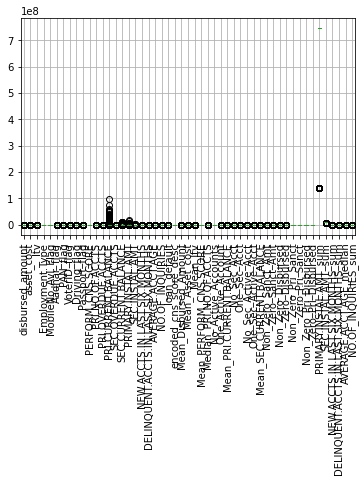

In [452]:
dfg.boxplot()
plt.xticks(rotation = 90)
plt.show()

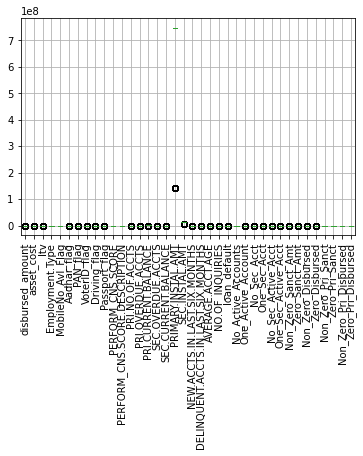

In [453]:
dft.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [454]:
dfg_train = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/dfg.csv')
dft_train = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/dft.csv')

In [455]:
print(dfg_train.shape)

(157822, 53)


In [456]:
print(dfg.shape)

(67671, 51)


In [457]:
print(dft_train.shape)

(157822, 40)


In [458]:
print(dft.shape)

(67671, 38)


In [467]:
pd.Series(dfg_train.columns)

0                                  Unnamed: 0
1                                Unnamed: 0.1
2                            disbursed_amount
3                                  asset_cost
4                                         ltv
5                             Employment.Type
6                           MobileNo_Avl_Flag
7                                 Aadhar_flag
8                                    PAN_flag
9                                VoterID_flag
10                               Driving_flag
11                              Passport_flag
12                          PERFORM_CNS.SCORE
13                            PRI.NO.OF.ACCTS
14                          PRI.OVERDUE.ACCTS
15                        PRI.CURRENT.BALANCE
16                          SEC.OVERDUE.ACCTS
17                        SEC.CURRENT.BALANCE
18                         PRIMARY.INSTAL.AMT
19                             SEC.INSTAL.AMT
20               NEW.ACCTS.IN.LAST.SIX.MONTHS
21        DELINQUENT.ACCTS.IN.LAST

In [466]:
pd.Series(dfg.columns)

0                            disbursed_amount
1                                  asset_cost
2                                         ltv
3                             Employment.Type
4                           MobileNo_Avl_Flag
5                                 Aadhar_flag
6                                    PAN_flag
7                                VoterID_flag
8                                Driving_flag
9                               Passport_flag
10                          PERFORM_CNS.SCORE
11                            PRI.NO.OF.ACCTS
12                          PRI.OVERDUE.ACCTS
13                        PRI.CURRENT.BALANCE
14                          SEC.OVERDUE.ACCTS
15                        SEC.CURRENT.BALANCE
16                         PRIMARY.INSTAL.AMT
17                             SEC.INSTAL.AMT
18               NEW.ACCTS.IN.LAST.SIX.MONTHS
19        DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
20                           AVERAGE.ACCT.AGE
21                            NO.O

In [468]:
dfg_train.head()

,Unnamed: 0,Unnamed: 0.1,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,Non_Zero_Pri_Sanct,Zero_Pri_Sanct,Non_Zero_Pri_Disbursed,Zero_Pri_Disbursed,PRIMARY.INSTAL.AMT_sum,SEC.INSTAL.AMT_sum,NEW.ACCTS.IN.LAST.SIX.MONTHS_mean,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_sum,AVERAGE.ACCT.AGE_median,NO.OF_INQUIRIES_sum
0,0,0,60947,70733,89.07,0,1,1,0,0,...,1,0,1,0,1690606580,47833337,49355,11306,0.083333,23683
1,1,1,52478,75847,72.51,1,1,1,0,0,...,1,0,1,0,1690606580,47833337,49355,11306,0.083333,23683
2,2,2,64669,83736,78.22,0,1,1,0,0,...,1,0,1,0,1690606580,47833337,49355,11306,0.083333,23683
3,3,3,45949,63477,74.36,0,1,1,0,0,...,1,0,1,0,1690606580,47833337,49355,11306,0.083333,23683
4,4,4,45349,70200,66.95,1,1,1,0,0,...,1,0,1,0,1690606580,47833337,49355,11306,0.083333,23683


In [469]:
dfg_train.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [470]:
dfg_train.shape

(157822, 51)

In [471]:
dft_train.head()

,Unnamed: 0,Unnamed: 0.1,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,No_Sec_Active_Acct,One_Sec_Active_Acct,Non_Zero_Sanct_Amt,Zero_Sanct_Amt,Non_Zero_Disbursed,Zero_Disbursed,Non_Zero_Pri_Sanct,Zero_Pri_Sanct,Non_Zero_Pri_Disbursed,Zero_Pri_Disbursed
0,0,0,53723.01,75498.49,74.22,0,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0
1,1,1,53723.01,75498.49,74.22,1,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0
2,2,2,53723.01,75498.49,74.22,0,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0
3,3,3,53723.01,75498.49,74.22,0,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0
4,4,4,53723.01,75498.49,74.22,1,1,1,0,0,...,1,0,0,1,0,1,1,0,1,0


In [472]:
dft_train.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [474]:
dft_train.shape

(157822, 38)

In [492]:
print(dfg_train.shape)
print(dfg.shape)
print(dft_train.shape)
print(dft.shape)

(157822, 51)
(67671, 51)
(157822, 38)
(67671, 38)


In [493]:
#checking the names of the columns

In [515]:
dfg_train_cols = list(dfg_train.columns)
dfg_test_cols = list(dfg.columns)

In [498]:
lt1 = []
for i in range(dfg_train.shape[1]):
    lt1.append(dfg_train_cols[i] == dfg_test_cols[i])
    if dfg_train_cols[i] != dfg_test_cols[i]:
        print(dfg_train_cols[i])
        print(dfg_test_cols[i])

NEW.ACCTS.IN.LAST.SIX.MONTHS_mean
NEW.ACCTS.IN.LAST.SIX.MONTHS_sum


In [499]:
lt1

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True]

In [501]:
len(lt1)

51

In [500]:
dft_train_cols = list(dft_train.columns)
dft_test_cols = list(dft.columns)

In [502]:
lt2 = []
for i in range(dft_train.shape[1]):
    lt2.append(dft_train_cols[i] == dft_test_cols[i])
    if dft_train_cols[i] != dft_test_cols[i]:
        print(dft_train_cols[i])
        print(dft_test_cols[i])

In [503]:
lt2

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [504]:
len(lt2)

38

In [505]:
dft_train_cols

['disbursed_amount',
 'asset_cost',
 'ltv',
 'Employment.Type',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.NO.OF.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'NO.OF_INQUIRIES',
 'loan_default',
 'No_Active_Accounts',
 'One_Active_Account',
 'No_Sec_Acct',
 'One_Sec_Acct',
 'No_Sec_Active_Acct',
 'One_Sec_Active_Acct',
 'Non_Zero_Sanct_Amt',
 'Zero_Sanct_Amt',
 'Non_Zero_Disbursed',
 'Zero_Disbursed',
 'Non_Zero_Pri_Sanct',
 'Zero_Pri_Sanct',
 'Non_Zero_Pri_Disbursed',
 'Zero_Pri_Disbursed']

In [506]:
dft_test_cols

['disbursed_amount',
 'asset_cost',
 'ltv',
 'Employment.Type',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.NO.OF.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'NO.OF_INQUIRIES',
 'loan_default',
 'No_Active_Accounts',
 'One_Active_Account',
 'No_Sec_Acct',
 'One_Sec_Acct',
 'No_Sec_Active_Acct',
 'One_Sec_Active_Acct',
 'Non_Zero_Sanct_Amt',
 'Zero_Sanct_Amt',
 'Non_Zero_Disbursed',
 'Zero_Disbursed',
 'Non_Zero_Pri_Sanct',
 'Zero_Pri_Sanct',
 'Non_Zero_Pri_Disbursed',
 'Zero_Pri_Disbursed']

In [513]:
dfg_train = dfg_train.rename(columns = {'NEW.ACCTS.IN.LAST.SIX.MONTHS_mean': 'NEW.ACCTS.IN.LAST.SIX.MONTHS_sum'})

In [508]:
#verify if the name is changed or not

In [516]:
lt1 = []
for i in range(dfg_train.shape[1]):
    lt1.append(dfg_train_cols[i] == dfg_test_cols[i])
    if dfg_train_cols[i] != dfg_test_cols[i]:
        print(dfg_train_cols[i])
        print(dfg_test_cols[i])

In [517]:
lt1

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [518]:
dfg_train.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'NO.OF_INQUIRIES', 'loan_default',
       'encoded_cns_score_desc', 'Mean_Disbursed_Amount', 'Mean_Asset_cost',
       'Mean_ltv', 'Mean_PERFORM_CNS.SCORE', 'Median_PRI.NO.OF.ACCTS',
       'No_Active_Accounts', 'One_Active_Account', 'Mean_PRI.CURRENT.BALANCE',
       'No_Sec_Acct', 'One_Sec_Acct', 'No_Sec_Active_Acct',
       'One_Sec_Active_Acct', 'Mean_SEC.CURRENT.BALANCE', 'Non_Zero_Sanct_Amt',
       'Zero_Sanct_Amt', 'Non_Zero_Disbursed', 'Zero_Disbursed',
       'Non_Zero_Pri_Sanct', 'Zero_Pri_Sanct', 'Non_Zero_Pri_Disburs

In [519]:
dfg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157822 entries, 0 to 157821
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   disbursed_amount                         157822 non-null  int64  
 1   asset_cost                               157822 non-null  int64  
 2   ltv                                      157822 non-null  float64
 3   Employment.Type                          157822 non-null  int64  
 4   MobileNo_Avl_Flag                        157822 non-null  int64  
 5   Aadhar_flag                              157822 non-null  int64  
 6   PAN_flag                                 157822 non-null  int64  
 7   VoterID_flag                             157822 non-null  int64  
 8   Driving_flag                             157822 non-null  int64  
 9   Passport_flag                            157822 non-null  int64  
 10  PERFORM_CNS.SCORE               

In [521]:
dft_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157822 entries, 0 to 157821
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     157822 non-null  float64
 1   asset_cost                           157822 non-null  float64
 2   ltv                                  157822 non-null  float64
 3   Employment.Type                      157822 non-null  int64  
 4   MobileNo_Avl_Flag                    157822 non-null  int64  
 5   Aadhar_flag                          157822 non-null  int64  
 6   PAN_flag                             157822 non-null  int64  
 7   VoterID_flag                         157822 non-null  int64  
 8   Driving_flag                         157822 non-null  int64  
 9   Passport_flag                        157822 non-null  int64  
 10  PERFORM_CNS.SCORE                    157822 non-null  float64
 11  PERFORM_CNS.S

In [522]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67671 entries, 0 to 67670
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   disbursed_amount                         67671 non-null  int64  
 1   asset_cost                               67671 non-null  int64  
 2   ltv                                      67671 non-null  float64
 3   Employment.Type                          67671 non-null  uint8  
 4   MobileNo_Avl_Flag                        67671 non-null  int32  
 5   Aadhar_flag                              67671 non-null  int32  
 6   PAN_flag                                 67671 non-null  int32  
 7   VoterID_flag                             67671 non-null  int32  
 8   Driving_flag                             67671 non-null  int32  
 9   Passport_flag                            67671 non-null  int32  
 10  PERFORM_CNS.SCORE                        67671

In [523]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67671 entries, 0 to 67670
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   disbursed_amount                     67671 non-null  float64
 1   asset_cost                           67671 non-null  float64
 2   ltv                                  67671 non-null  float64
 3   Employment.Type                      67671 non-null  uint8  
 4   MobileNo_Avl_Flag                    67671 non-null  int32  
 5   Aadhar_flag                          67671 non-null  int32  
 6   PAN_flag                             67671 non-null  int32  
 7   VoterID_flag                         67671 non-null  int32  
 8   Driving_flag                         67671 non-null  int32  
 9   Passport_flag                        67671 non-null  int32  
 10  PERFORM_CNS.SCORE                    67671 non-null  float64
 11  PERFORM_CNS.SCORE.DESCRIPTIO

In [524]:
dfg_train.to_csv('dfg_train.csv')
dft_train.to_csv('dft_train.csv')

In [525]:
dfg.to_csv('dfg_test.csv')
dft.to_csv('dft_test.csv')

In [527]:
print(dfg_train.shape)
print(dft_train.shape)
print(dfg.shape)
print(dft.shape)

(157822, 51)
(157822, 38)
(67671, 51)
(67671, 38)
